# Проект "Убытки и поиск точек роста приложения Procrastinate Pro+"

### Описание проекта
Развлекательное приложение Procrastinate Pro+ несет убытки за период последних нескольких месяцев, что усугубляется серьезными затратами на рекламу. В данной ситуации требуется анализ текущей ситуации, а также выявить точки роста продукта.

**Цель проекта**: выявить причины убытков и точки роста продукта Procrastinate Pro+.

**Задачи проекта**:
1) подготовить данные  анализу,  
2) рассчитать и проанализировать LTV, ROI, Retention и CR,  
3) произвести исследовательский анализ данных,  
4) проанализировать расходы на маркетинг,  
5) оценить окупаемость рекламы,  
6) сформулировать выводы с рекомендациями.

**Круг интересующих вопросов**:
- По каким каналам приходят пользователи и какие устройства они используют?
- Какова стоимость привлечения пользователей в зависимости от рекламных каналов?
- Какова доходность, приходящаяся на каждого клиента?
- За какой срок наступает окупаемость привлечения клиента?
- Какие факторы препятствуют привлечению клиентов?

### Описание данных
Для решения поставленных задач представлено **3 датасета**:

1) **Датасет `visits_info_short.csv`** с логом посещений сайта:  
    - `User Id` — уникальный идентификатор пользователя,  
    - `Region` — страна пользователя,  
    - `Device` — тип устройства пользователя,  
    - `Channel` — идентификатор источника перехода,  
    - `Session Start` — дата и время начала сессии,  
    - `Session End` — дата и время окончания сессии.  

<br>

2) **Датасет `orders_info_short.csv`** с данными заказов:  
    - `User Id` — уникальный идентификатор пользователя,  
    - `Event Dt` — дата и время покупки,  
    - `Revenue` — сумма заказа.  

<br>

3) **Датасет `costs_info_short.csv`** с данными о расходах на рекламу:  
    - `dt` — дата проведения рекламной кампании,  
    - `Channel` — идентификатор рекламного источника,  
    - `costs` — расходы на эту кампанию.  

<br>

------------------------------------------------------------

## Этап 1. Загружаем данные и подготавливаем их к анализу
Доступны следующие датасеты:  
1) датасет `visits_info_short.csv`  
2) датасет `orders_info_short.csv`  
3) датасет `costs_info_short.csv`  

Для подготовки данных к дальнейшему анализу импортируем необходимые библиотеки и загрузим датасеты в отдельные датафреймы:  
1) датасет `visits_info_short.csv` в датафрейм `visits`  
2) датасет `orders_info_short.csv` в датафрейм `orders`  
3) датасет `costs_info_short.csv` в датафрейм `costs`  

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем датасеты в датафреймы.

In [2]:
# загружаем датасеты в датафреймы
visits = pd.read_csv('https://drive.google.com/uc?id=16ZpsEcKprfoyx1ZUSPexVpdODEura2cP')
orders = pd.read_csv('https://drive.google.com/uc?id=1EPwaFKHHqVz1vbLxxY8ZDDjjWIoo1is7')
costs = pd.read_csv('https://drive.google.com/uc?id=13C3FKU_S2bZn1U8EhB9epU8-tPETnPBg')

Теперь, когда датафреймы загружены, ознакомимся с ними, представив их первые записи, а также информационные сводки.

In [3]:
# ознакомимся с полученными датафреймами
display(visits.head())
display(orders.head())
costs.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [4]:
# ознакомимся с общей информацией о датафреймах
display(visits.info())
print('\n')
display(orders.info())
print('\n')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Как мы можем наблюдать, датафреймы не демонстрируют явных пропусков, однако очевидны проблемы с типами данных некоторых столбцов, а именно даты представлены как object в следующих столбцах: 
- столбцы `Session Start` и `Session End` в датафрейме `visits`, 
- столбец `Event Dt` в датафрейме `orders`,
- столбец `dt` в датафрейме `costs`.

Более того, наименование столбцов не всегда соответствует стандарту PEP8, что также необходимо скорректировать. Приступим к корректировке датафреймов.

In [5]:
# переименуем названия столбцов в соответствии с PEP8
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [6]:
# проверим изменения в наименовании столбцов
display(visits.columns, orders.columns, costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

Изменив наименования столбцов, сконвертируем данные выявленных столбцов из типа `object` в тип `datetime`.

In [7]:
# объявим функцию для вывода общей сводки для датафрейма
def get_df_info(*dataframes):
    for df in dataframes:
        print('\033[1m' + 'Сводка по датафрейму:' + '\033[0m')
        display(df.info())
        print('\n')

In [8]:
# получим сводку по каждому датафрейму
get_df_info(visits, orders, costs)

Сводка по датафрейму:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None



Сводка по датафрейму:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None



Сводка по датафрейму:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

In [9]:
# конвертация данных с датами в тип "datetime"
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# получим сводку по каждому датафрейму
get_df_info(visits, orders, costs)

Сводка по датафрейму:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None



Сводка по датафрейму:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None



Сводка по датафрейму:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Скорректировав типы данных, следует проверить датафреймы на наличие пропусков и дубликатов. Уже на предварительном знакомстве с датафреймами заметны имена с заглавными буквами, а также строковые значения с записью по принципу camelCase. Данные особенности могут быть причиной неявных дубликатов. Для уверенности в целостности и готовности наших данных, проверим их на пропуски и дубликаты.

In [10]:
# объявим функцию для проверки наличия пропусков в датафрейме
def get_df_na(*dataframes):
    for df in dataframes:
        print('\033[1m' + 'Количество пропусков в таблице:' + '\033[0m')
        display(df.isna().sum())
        print('\n')

In [11]:
# проверим наличие пропусков
get_df_na(visits, orders, costs)

Количество пропусков в таблице:


user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64



Количество пропусков в таблице:


user_id     0
event_dt    0
revenue     0
dtype: int64



Количество пропусков в таблице:


dt         0
channel    0
costs      0
dtype: int64

Как и было выявлено в информационной сводке по датафреймам, явных пропусков не обнаружено. Теперь проверим дубликаты.

In [12]:
# объявим функцию для проверки наличия дубликатов в датафрейме
def get_df_doubles(*dataframes):
    for df in dataframes:
        print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m')
        display(df.duplicated().sum())
        print('\n')

In [13]:
# проверим наличие явных дубликатов
get_df_doubles(visits, orders, costs)

Количество дубликатов в таблице:


0



Количество дубликатов в таблице:


0



Количество дубликатов в таблице:


0

Явных дубликатов не обнаружено. Теперь проверим датафреймы на предмет неявных дубликатов путем выявления уникальных значений.

In [14]:
# объявим функцию для проверки уникальных значений в датафрейме
def get_df_unique(*dataframes):
    for df in dataframes:
        print('\033[1m' + 'Уникальные значения в таблице:' + '\033[0m')
        for col in df.columns:
            display(df[col].unique())
            print('\n')
        print('\n')

In [15]:
# проверим уникальные значения столбцах
get_df_unique(visits, orders, costs)

Уникальные значения в таблице:


array([981449118918, 278965908054, 590706206550, ..., 519022174024,
       354394066496, 279181973476], dtype=int64)

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

<DatetimeArray>
['2019-05-01 02:36:01', '2019-05-01 04:46:31', '2019-05-01 14:09:25',
 '2019-05-01 00:29:59', '2019-05-01 03:33:35', '2019-05-01 07:14:52',
 '2019-05-01 09:03:21', '2019-05-01 09:37:03', '2019-05-01 10:26:00',
 '2019-05-01 04:39:53',
 ...
 '2019-10-31 17:12:29', '2019-10-31 01:26:31', '2019-10-31 07:07:13',
 '2019-10-31 11:38:01', '2019-10-31 11:14:15', '2019-10-31 13:28:12',
 '2019-10-31 22:14:52', '2019-10-31 01:40:48', '2019-10-31 07:37:34',
 '2019-10-31 14:17:43']
Length: 306813, dtype: datetime64[ns]

<DatetimeArray>
['2019-05-01 02:45:01', '2019-05-01 04:47:35', '2019-05-01 15:32:08',
 '2019-05-01 00:54:25', '2019-05-01 03:57:40', '2019-05-01 08:19:56',
 '2019-05-01 10:08:39', '2019-05-01 10:00:43', '2019-05-01 10:59:17',
 '2019-05-01 04:57:05',
 ...
 '2019-10-31 00:54:39', '2019-10-31 17:15:11', '2019-10-31 01:39:21',
 '2019-10-31 07:38:52', '2019-10-31 11:50:29', '2019-10-31 14:39:29',
 '2019-10-31 22:39:36', '2019-10-31 01:41:31', '2019-10-31 07:37:55',
 '2019-10-31 15:17:04']
Length: 306793, dtype: datetime64[ns]





Уникальные значения в таблице:


array([188246423999, 174361394180, 529610067795, ..., 492983055500,
       651604369137, 168548862926], dtype=int64)

<DatetimeArray>
['2019-05-01 23:09:52', '2019-05-01 12:24:04', '2019-05-01 11:34:04',
 '2019-05-01 15:34:40', '2019-05-01 13:59:51', '2019-05-01 01:56:28',
 '2019-05-01 02:39:21', '2019-05-01 02:02:18', '2019-05-01 03:39:47',
 '2019-05-01 18:16:50',
 ...
 '2019-10-31 15:19:00', '2019-10-31 21:45:38', '2019-10-31 18:49:29',
 '2019-10-31 09:38:22', '2019-10-31 03:23:40', '2019-10-31 16:19:07',
 '2019-10-31 01:17:17', '2019-10-31 06:17:29', '2019-10-31 22:46:19',
 '2019-10-31 13:29:06']
Length: 40163, dtype: datetime64[ns]

array([ 4.99,  5.99,  9.99, 49.99, 19.99])





Уникальные значения в таблице:


array([datetime.date(2019, 5, 1), datetime.date(2019, 5, 2),
       datetime.date(2019, 5, 3), datetime.date(2019, 5, 4),
       datetime.date(2019, 5, 5), datetime.date(2019, 5, 6),
       datetime.date(2019, 5, 7), datetime.date(2019, 5, 8),
       datetime.date(2019, 5, 9), datetime.date(2019, 5, 10),
       datetime.date(2019, 5, 11), datetime.date(2019, 5, 12),
       datetime.date(2019, 5, 13), datetime.date(2019, 5, 14),
       datetime.date(2019, 5, 15), datetime.date(2019, 5, 16),
       datetime.date(2019, 5, 17), datetime.date(2019, 5, 18),
       datetime.date(2019, 5, 19), datetime.date(2019, 5, 20),
       datetime.date(2019, 5, 21), datetime.date(2019, 5, 22),
       datetime.date(2019, 5, 23), datetime.date(2019, 5, 24),
       datetime.date(2019, 5, 25), datetime.date(2019, 5, 26),
       datetime.date(2019, 5, 27), datetime.date(2019, 5, 28),
       datetime.date(2019, 5, 29), datetime.date(2019, 5, 30),
       datetime.date(2019, 5, 31), datetime.date(2019, 6, 1),
  

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

array([113.3  ,  78.1  ,  85.8  , 136.4  , 122.1  , 118.8  , 101.2  ,
       100.1  ,  93.5  , 104.5  , 132.   , 105.6  ,  92.4  , 110.   ,
       117.7  , 128.7  ,  99.   ,  88.   , 115.5  ,  97.9  ,  82.5  ,
       140.8  ,  91.3  , 107.8  , 169.4  , 178.2  , 213.4  , 214.5  ,
       234.3  , 159.5  , 147.4  , 138.6  , 143.   , 193.6  , 135.3  ,
       163.9  , 124.3  , 114.4  , 176.   , 210.1  , 158.4  , 144.1  ,
       171.6  , 174.9  , 258.5  , 232.1  , 237.6  , 217.8  , 227.7  ,
       235.4  , 255.2  , 264.   , 242.   , 233.2  , 204.6  , 240.9  ,
       194.7  , 179.3  , 168.3  , 156.2  , 134.2  , 182.6  , 160.6  ,
       123.2  ,  90.2  , 108.9  , 145.2  , 189.2  , 141.9  , 133.1  ,
       206.8  , 198.   , 167.2  , 161.7  , 218.9  , 261.8  , 216.7  ,
       229.9  , 155.1  , 188.1  , 205.7  , 192.5  , 152.9  , 228.8  ,
       225.5  , 203.5  , 191.4  , 211.2  , 207.9  , 221.1  , 183.7  ,
       148.5  , 170.5  , 195.8  , 173.8  , 248.6  , 299.2  , 236.5  ,
       243.1  , 294.

Как мы видим, уникальные значения в категориальных столбцах не имеют аналогов по регистру или пробелам, поэтому дополнительной обработки значений не потребуется.

### Вывод по этапу 1

В ходе этапа 1 мы загрузили датасеты в датафреймы `visits`, `orders` и `costs` и подготовили данные к последующему анализу путем проверки данных на наличие пропусков и дубликатов, изменения наименования столбцов в соответствии с PEP8, а также конвертации дат в формат `datetime`. Теперь данные готовы к расчету и анализу релевантных метрик.

---------------------------------------------

## Этап 2. Функциональность для расчета LTV, ROI, Retention и CR
После подготовки данных мы можем приступить к расчету метрик LTV, ROI, Retention и CR. Для этого объявим функции для их дальнейшего расчета.

В первую очередь нам потребуется функция для создания профилей пользователей `get_profiles()`. Объявим ее.

In [16]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Проверим роботоспособность функции, создав профили пользователей.

In [17]:
# создаем датафрейм с профилями пользователей
profiles = get_profiles(
    sessions = visits, 
    orders = orders, 
    ad_costs = costs
)

# ознакомимся с результатом
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Теперь, когда профили готовы, объявим дополнительные функции для расчета метрик, а также проверим их роботоспособность на примере горизонта в 7 дней с момента анализа 27 октября 2019 г. Начнем с расчета удержания.

In [18]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [19]:
# проверим работу функции, высчитав удержание 7-ого дня
retention_raw_7, retention_7, retention_in_time_7 = get_retention(
    profiles = profiles,
    sessions = visits,
    observation_date = datetime(2019, 10, 27).date(),
    horizon_days = 7
)

# ознакомимся с результатами
display(retention_raw_7.head(5))
display(retention_7) 
retention_in_time_7.head(5)

user_id            first_ts   channel  device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
1   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
2   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
3  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States  2019-07-09   
4  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States  2019-07-09   

       month  payer  acquisition_cost       session_start  lifetime  
0 2019-05-01   True          1.088172 2019-05-07 20:58:57         0  
1 2019-05-01   True          1.088172 2019-05-08 06:00:42         0  
2 2019-05-01   True          1.088172 2019-05-09 07:33:16         1  
3 2019-07-01  False          1.107237 2019-07-09 12:46:07         0  
4 2019-07-01  False          1.107237 2019-07-10 22:27:24         1

cohort_size    0         1         2         3         4         5  \
payer                                                                       
False       135866  1.0  0.176704  0.086357  0.051455  0.034549  0.024568   
True          8542  1.0  0.404706  0.316905  0.260009  0.227347  0.208382   

              6  
payer            
False  0.018518  
True   0.187193

cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          868  1.0  0.191244  0.074885  0.047235  0.031106   
      2019-05-02          728  1.0  0.185440  0.111264  0.046703  0.035714   
      2019-05-03          807  1.0  0.175960  0.091698  0.053284  0.026022   
      2019-05-04          960  1.0  0.179167  0.096875  0.065625  0.027083   
      2019-05-05          935  1.0  0.193583  0.096257  0.065241  0.034225   

                         5         6  
payer dt                              
False 2019-05-01  0.021889  0.023041  
      2019-05-02  0.017857  0.015110  
      2019-05-03  0.035936  0.022305  
      2019-05-04  0.016667  0.019792  
      2019-05-05  0.020321  0.020321

Функционал удержания работает. Проведем аналогичную процедуру с конверсией.

In [20]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [21]:
# проверим работу функции, высчитав конверсию 7-ого дня
cr_raw_7, cr_7, cr_in_time_7 = get_conversion(
    profiles = profiles,
    purchases = orders,
    observation_date = datetime(2019, 10, 27).date(),
    horizon_days = 7
)

# ознакомимся с результатами
display(cr_raw_7.head(5))
display(cr_7) 
cr_in_time_7.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost            event_dt  \
0  2019-05-07 2019-05-01   True          1.088172 2019-05-07 20:59:09   
1  2019-07-09 2019-07-01  False          1.107237                 NaT   
2  2019-10-01 2019-10-01  False          0.000000                 NaT   
3  2019-08-22 2019-08-01  False          0.988235                 NaT   
4  2019-10-02 2019-10-01  False          0.230769                 NaT   

   lifetime     cohort  
0       0.0  All users  
1       NaN  All users  
2       NaN  All users  
3       NaN  All users  
4       NaN  All users

cohort_size       0.0       1.0       2.0       3.0      4.0  \
cohort                                                                    
All users       144408  0.041016  0.046833  0.049665  0.051673  0.05312   

                5.0       6.0  
cohort                         
All users  0.054048  0.054831

cohort_size       0.0       1.0       2.0       3.0       4.0  \
dt                                                                          
2019-05-01          909  0.031903  0.036304  0.038504  0.038504  0.040704   
2019-05-02          758  0.029024  0.035620  0.036939  0.036939  0.036939   
2019-05-03          849  0.031802  0.037691  0.043581  0.044759  0.047114   
2019-05-04         1015  0.035468  0.039409  0.040394  0.042365  0.047291   
2019-05-05          970  0.023711  0.026804  0.028866  0.030928  0.032990   

                 5.0       6.0  
dt                              
2019-05-01  0.040704  0.040704  
2019-05-02  0.036939  0.036939  
2019-05-03  0.047114  0.047114  
2019-05-04  0.047291  0.048276  
2019-05-05  0.032990  0.032990

Добавим функцию расчета LTV и ROI и также проверим ее.

In [22]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [23]:
# проверим работу функции, высчитав LTV и ROI 7-ого дня
ltv_raw_7, ltv_7, ltv_in_time_7, roi_7, roi_in_time_7 = get_ltv(
    profiles = profiles,
    purchases = orders,
    observation_date = datetime(2019, 10, 27).date(),
    horizon_days = 7
)

# ознакомимся с результатами
display(ltv_raw_7.head(5))
display(ltv_7)
display(ltv_in_time_7.head(5))
display(roi_7)
roi_in_time_7.head(5)

user_id            first_ts   channel  device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
1   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
2   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
3  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States  2019-07-09   
4  6085896 2019-10-01 09:58:33   organic  iPhone         France  2019-10-01   

       month  payer  acquisition_cost            event_dt  revenue  lifetime  \
0 2019-05-01   True          1.088172 2019-05-07 20:59:09     4.99       0.0   
1 2019-05-01   True          1.088172 2019-05-08 06:01:28     4.99       0.0   
2 2019-05-01   True          1.088172 2019-05-09 07:34:01     4.99       1.0   
3 2019-07-01  False          1.107237                 NaT      NaN       NaN   
4 2019-10-01  False          0.000000                 NaT      NaN       NaN   

      cohort  
0  All users  
1  All users  
2  All users  
3  All users  
4  All users

cohort_size       0.0       1.0       2.0       3.0       4.0  \
cohort                                                                     
All users       144408  0.241528  0.311375  0.364575  0.409407  0.448468   

                5.0       6.0  
cohort                         
All users  0.482715  0.513992

cohort_size       0.0       1.0       2.0       3.0       4.0  \
dt                                                                          
2019-05-01          909  0.160297  0.215193  0.260209  0.294246  0.316205   
2019-05-02          758  0.157995  0.302942  0.335858  0.381939  0.408272   
2019-05-03          849  0.165748  0.249211  0.326796  0.379694  0.503227   
2019-05-04         1015  0.232138  0.286217  0.315714  0.359970  0.459369   
2019-05-05          970  0.140969  0.229546  0.244979  0.265557  0.291278   

                 5.0       6.0  
dt                              
2019-05-01  0.316205  0.327184  
2019-05-02  0.441201  0.454367  
2019-05-03  0.550259  0.556137  
2019-05-04  0.518365  0.528197  
2019-05-05  0.317000  0.332433

cohort_size       cac      0.0       1.0      2.0       3.0  \
cohort                                                                   
All users       144408  0.697431  0.34631  0.446459  0.52274  0.587021   

                4.0       5.0       6.0  
cohort                                   
All users  0.643028  0.692133  0.736979

cohort_size       cac       0.0       1.0       2.0       3.0  \
dt                                                                          
2019-05-01          909  0.335336  0.478020  0.641723  0.775966  0.877469   
2019-05-02          758  0.304545  0.518790  0.994737  1.102818  1.254132   
2019-05-03          849  0.309859  0.534915  0.804273  1.054662  1.225377   
2019-05-04         1015  0.332020  0.699169  0.862047  0.950890  1.084184   
2019-05-05          970  0.329799  0.427439  0.696019  0.742814  0.805208   

                 4.0       5.0       6.0  
dt                                        
2019-05-01  0.942950  0.942950  0.975691  
2019-05-02  1.340597  1.448721  1.491953  
2019-05-03  1.624054  1.775839  1.794807  
2019-05-04  1.383561  1.561246  1.590861  
2019-05-05  0.883200  0.961192  1.007987

Дополнительно к функциям расчета метрик нам понадобятся функции визуализации полученных результатов, а именно:
- `plot_retention()` для визуализации удержания,
- `plot_conversion()` для визуализации конверсии,
- `plot_ltv_roi()` для визуализации LTV и ROI.

Также для нивелирования шумности графиков добавим функцию `filter_data()` для их сглаживания путем скользящего среднего внутри вышеописанных функций.

In [24]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [25]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

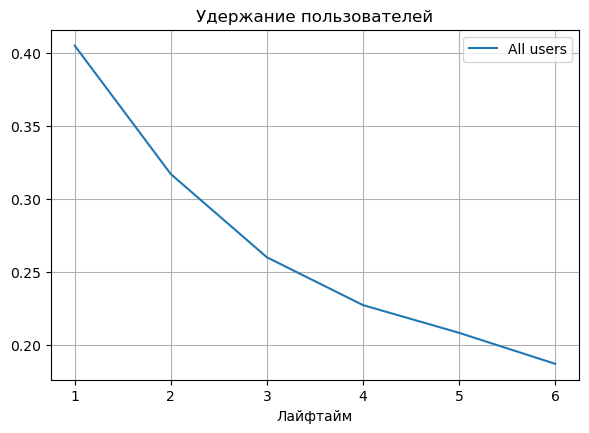

In [26]:
# проверим работоспособность функции на результате функции get_retention()
plot_retention(
    retention = retention_7, 
    retention_history = retention_in_time_7, 
    horizon = 7
)
plt.title('Удержание пользователей')
plt.show()

In [27]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    if horizon > 8:
        ax2.tick_params(labelrotation=45)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

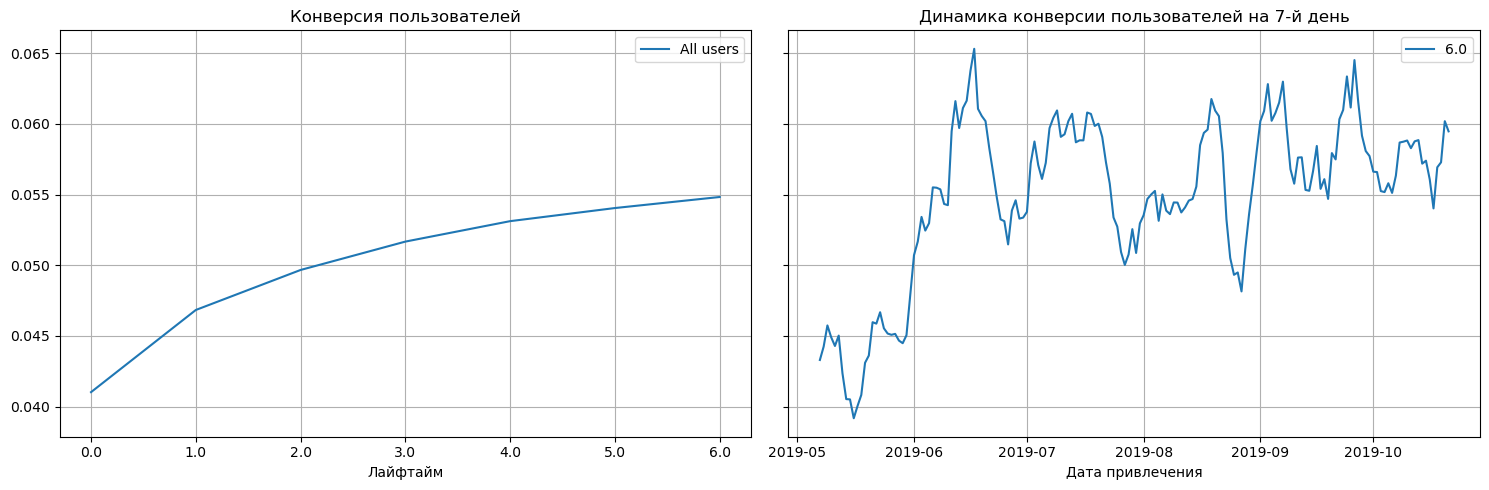

In [28]:
# проверим работоспособность функции на результате функции get_conversion()
plot_conversion(cr_7, cr_in_time_7, horizon=7)
plt.show()

In [29]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    if horizon > 8:
        ax2.tick_params(labelrotation=45)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    if horizon > 8:
        ax3.tick_params(labelrotation=45)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    if horizon > 8:
        ax5.tick_params(labelrotation=45)
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

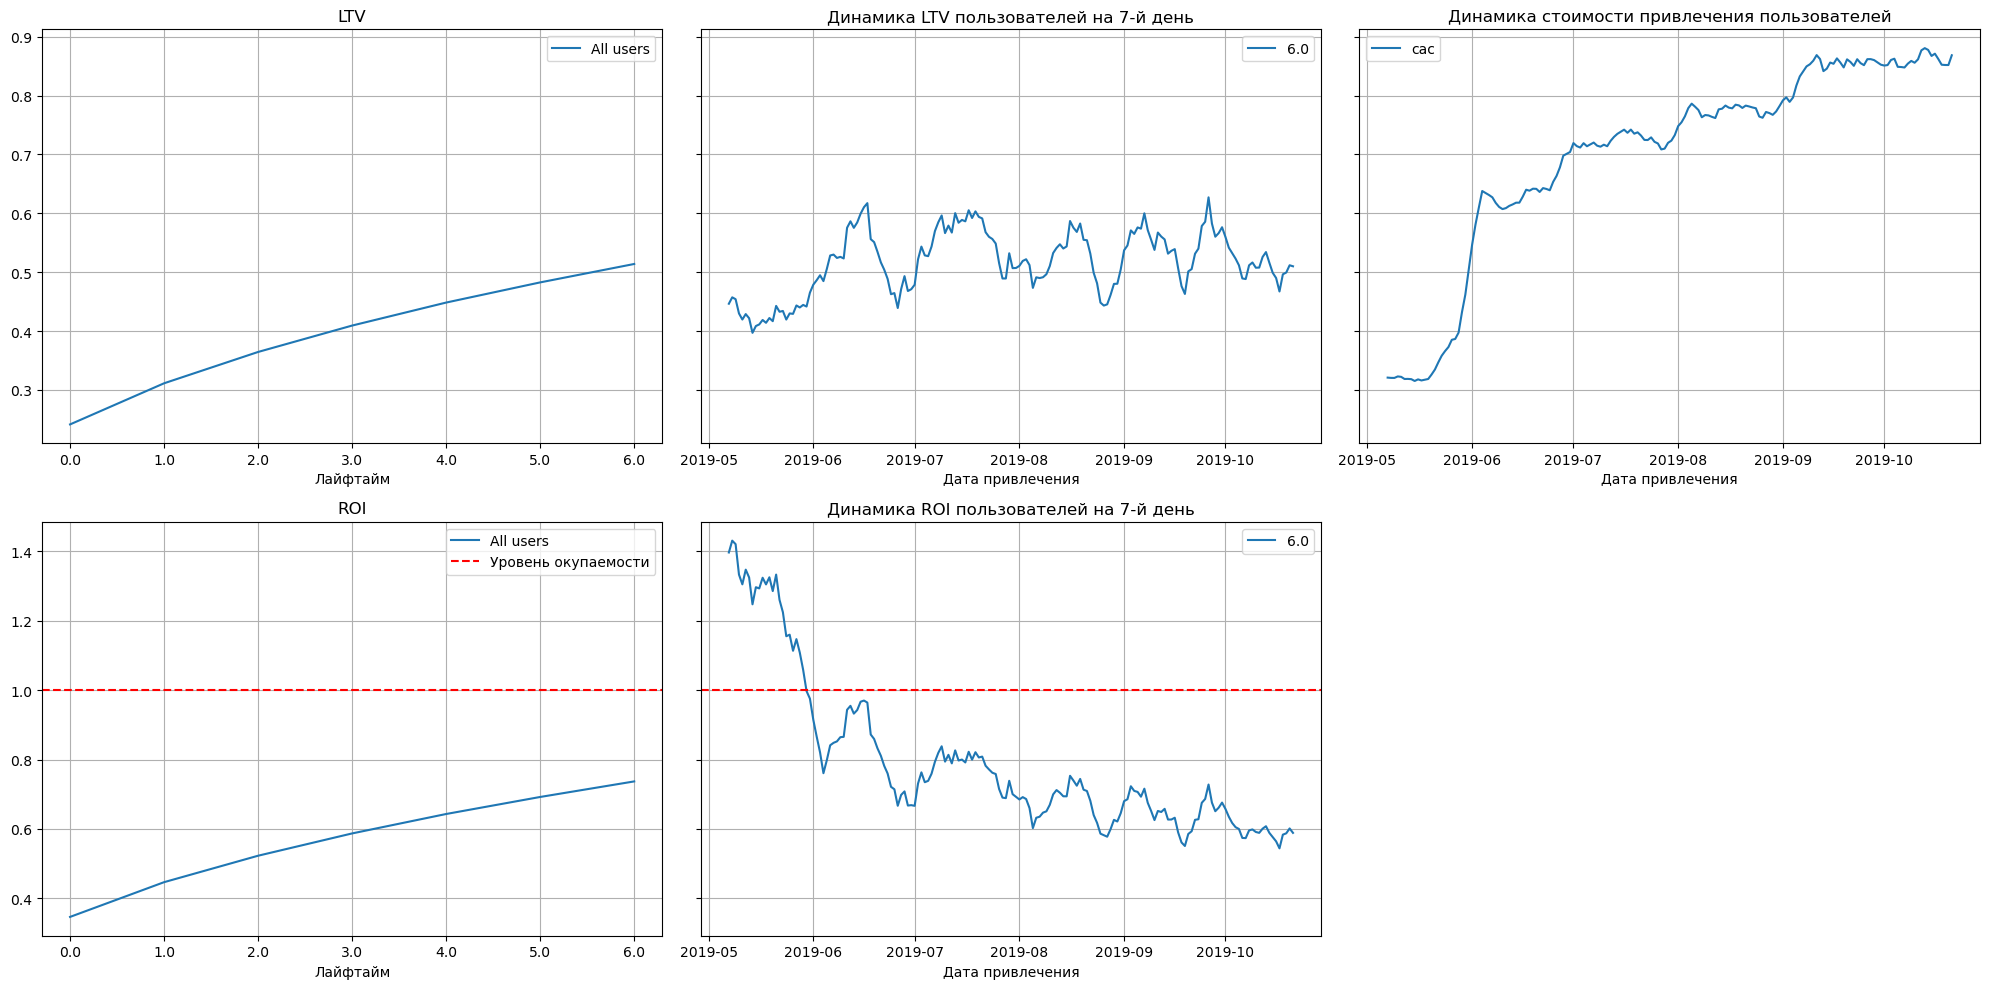

In [30]:
# проверим работоспособность функции на результате функции get_ltv()
plot_ltv_roi(ltv_7, ltv_in_time_7, roi_7, roi_in_time_7, 7)
plt.show()

Теперь, когда все функции для расчета и визуализации метрик готовы, мы можем приступить к исследовательскому анализу.

-----------------

## Этап 3. Исследовательский анализ данных
На данном этапе нам предстоит составить профили пользователей с опрделением максимальной и минимальной даты их привлечения. Важны такие аспекты, как страны платящих пользователей и их доля от общего числа, устройства с учетом доли платящих и неплатящих пользователей, а также рекламные источники привлечения с учетом наибольшего числа платящих пользователей, пришедших с определенных каналов. 

### Анализ профилей пользователей приложения Procrastinate Pro+
Для исследовательского анализа нам потребуется составить профили пользователей приложения. Ожидаемая таблица станет основой для дальнейшей сегментации пользователей по интересующим нас признакам.  
Получим профили пользователей с помощью функции `get_profiles()`.

In [31]:
# сформируем датафрейм профилей пользователей
profiles = get_profiles(visits, orders, costs)
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt      month  payer  acquisition_cost  
0       2019-05-07 2019-05-01   True          1.088172  
1       2019-07-09 2019-07-01  False          1.107237  
2       2019-10-01 2019-10-01  False          0.000000  
3       2019-08-22 2019-08-01  False          0.988235  
4       2019-10-02 2019-10-01  False          0.230769  
...            ...        ...    ...               ...  
150003  2019-09-28 2019-09-01  False          3.500000  
150004  2019-10-21 2019-10-01  False          0.000000  
150005  2019-07-23 2019-07-01  False          2.600000  
150006  2019-09-28 2019-09-01  False          0.205714  
150007  2019-10-18 2019-10-01  False          0.000000  

[150008 rows x 9 columns]

In [32]:
# дополним датафрейм сроком располагаемых профилей
display('Срок располагаемых данных: с {} по {}'.format(profiles['first_ts'].min(), profiles['first_ts'].max()))
display('Период располагаемых данных: {}'.format(profiles['first_ts'].max()-profiles['first_ts'].min()))

'Срок располагаемых данных: с 2019-05-01 00:00:41 по 2019-10-27 23:59:04'

'Период располагаемых данных: 179 days 23:58:23'

Как мы видим, у нас в распоряжении профили пользователей за примерно полгода (c 01.05.2019 по 27.10.2019), что соответствует описанию представленных для анализа данных. Профили насчитывают 150 008 пользователей вместе с первой  временной меткой, рекламным источником перехода, устройством использования продукта, страной, датой и месяцем покупки, статусом "платящий"/"неплатящий" и стоимостью привлечения в долларах.

Попробуем получить общее представление о пользователях за располагаемые полгода. Начнем с динамики появления пользователей.

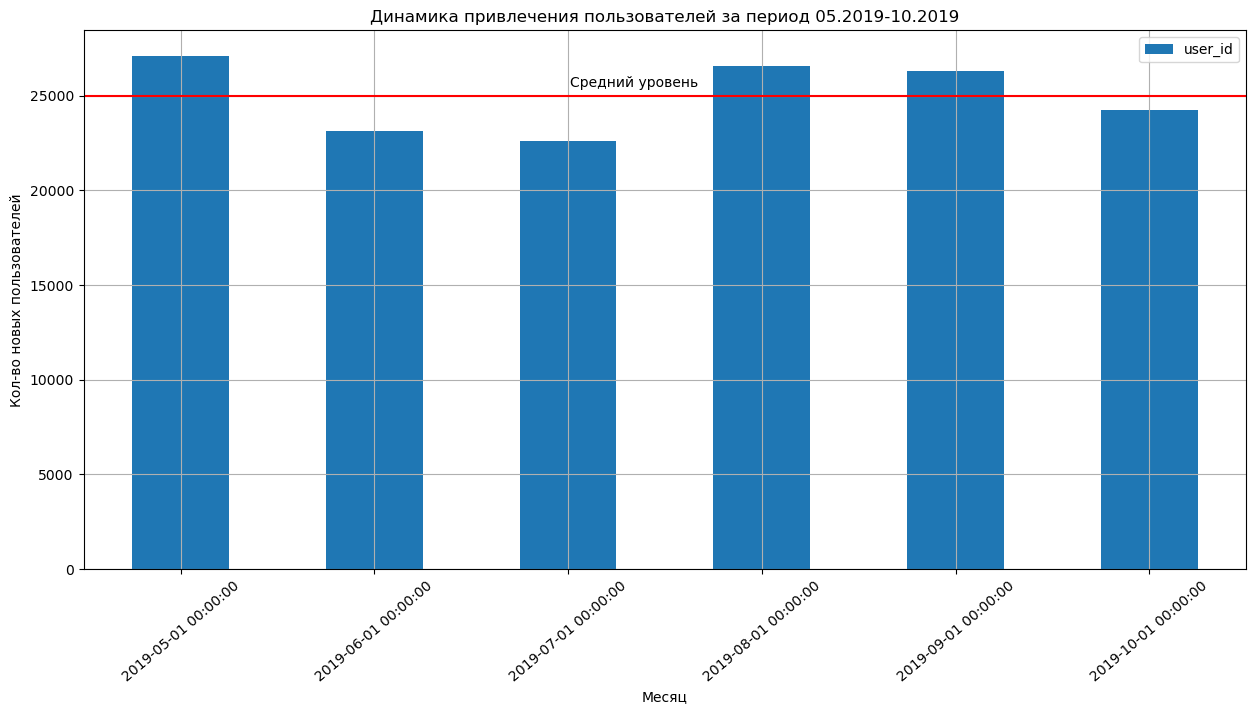

In [33]:
# построим график динамики привлечения пользователей
monthly_users = profiles.pivot_table(
    index = 'month', 
    values = 'user_id', 
    aggfunc = {'user_id':'count'})
ax = monthly_users.plot(
    kind = 'bar',
    title = 'Динамика привлечения пользователей за период 05.2019-10.2019',
    grid = True,
    xlabel = 'Месяц',
    ylabel = 'Кол-во новых пользователей',
    figsize = (15, 7),
    rot = 40
)
ax = plt.axhline(y=monthly_users['user_id'].mean(), color='red', linestyle='-')
plt.text(2.01, 25500, 'Средний уровень')
plt.show()

Как мы можем наблюдать, за май-октябрь 2019 года продукту удалось за каждый месяц привлекать в среднем 25 000 новых пользователей. Июнь, июль и октябрь демонстрируют небольшое падение, но в целом динамика привлечения пользователей стабильна.  
Посмотрим на пользователей с точки зрения их стран и устройств.

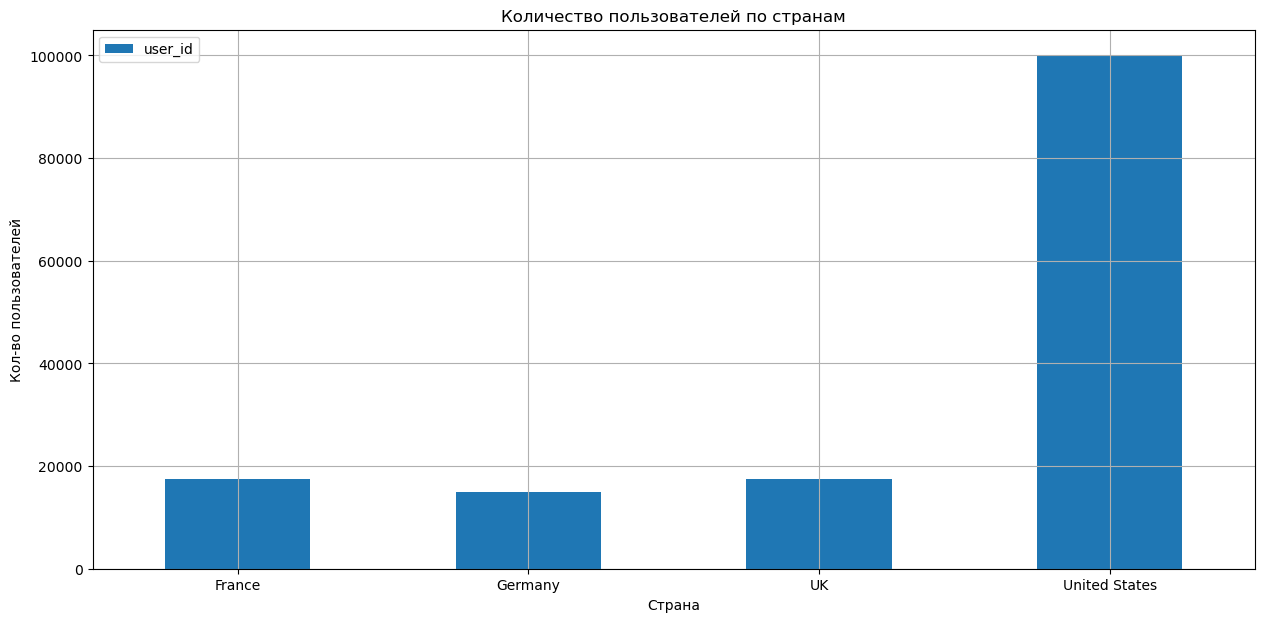

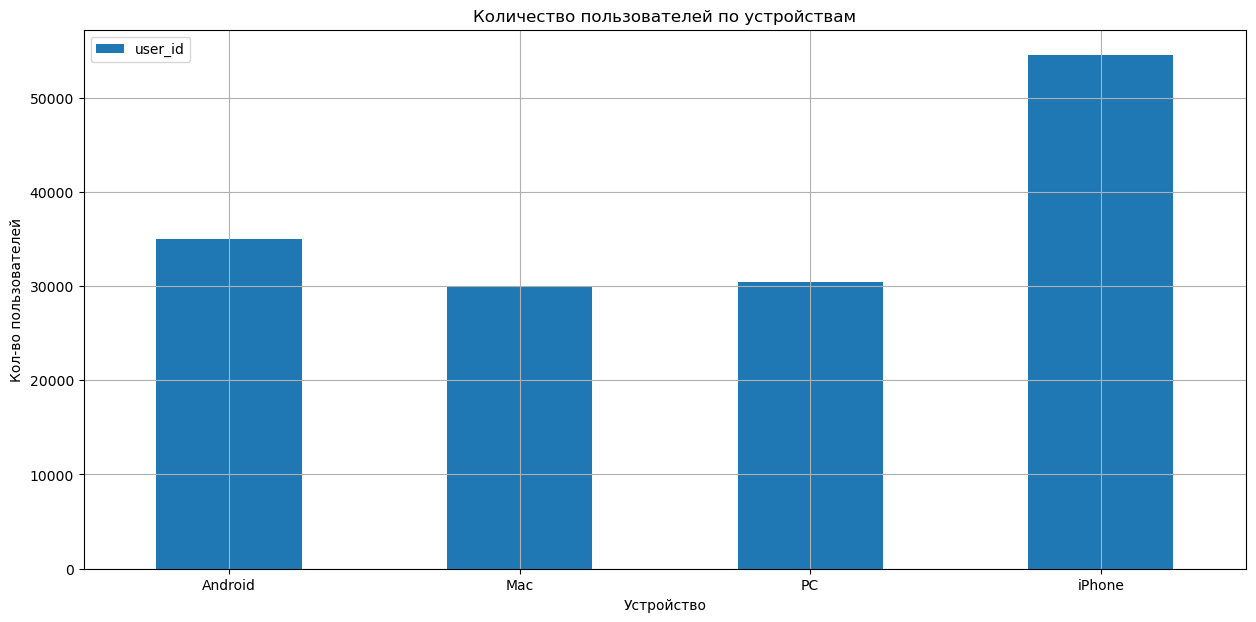

In [34]:
# построим график стран по количеству пользователей
ax = profiles.pivot_table(
    index = 'region', 
    values = 'user_id', 
    aggfunc = {'user_id':'count'}).plot(
    kind = 'bar',
    title = 'Количество пользователей по странам',
    grid = True,
    xlabel = 'Страна',
    ylabel = 'Кол-во пользователей',
    figsize = (15, 7),
    rot = 0
)
# дополним график устрйствами по количеству пользователей
ax = profiles.pivot_table(
    index = 'device', 
    values = 'user_id', 
    aggfunc = {'user_id':'count'}).plot(
    kind = 'bar',
    title = 'Количество пользователей по устройствам',
    grid = True,
    xlabel = 'Устройство',
    ylabel = 'Кол-во пользователей',
    figsize = (15, 7),
    rot = 0
)
plt.show()

В отношении стран пользователей наибольшую долю занимают пользователеи из США - около 10 000 или 2/3 от всех пользователей. Пользователи из Европы (Франция, Германия и Соединенное Королевство) занимают оставшуюся треть примерно равномерно на уровне 1700 пользователей.  
В отношении устройств пользователей, то мы наблюдаем лидерство iPhone над другимим устройствами - свыше 50 000. Остальные устройства представлены достаточно однородными пользовательскими группами, на треть меньшими по сравнению с лидером, - около 30 000 пользователей. Особо стоит отметить, что Android на 5 000 обгоняет десктопные платформы - Mac и PC, оба представленные 30 000 пользователей.  
На основе графиков выше мы можем особо отметить важность ползователей из США и мобильных платформ - в особенности iPhone - для продукта.

Дополнительно оценим эффективность различных рекламных каналов привлечения пользователей.

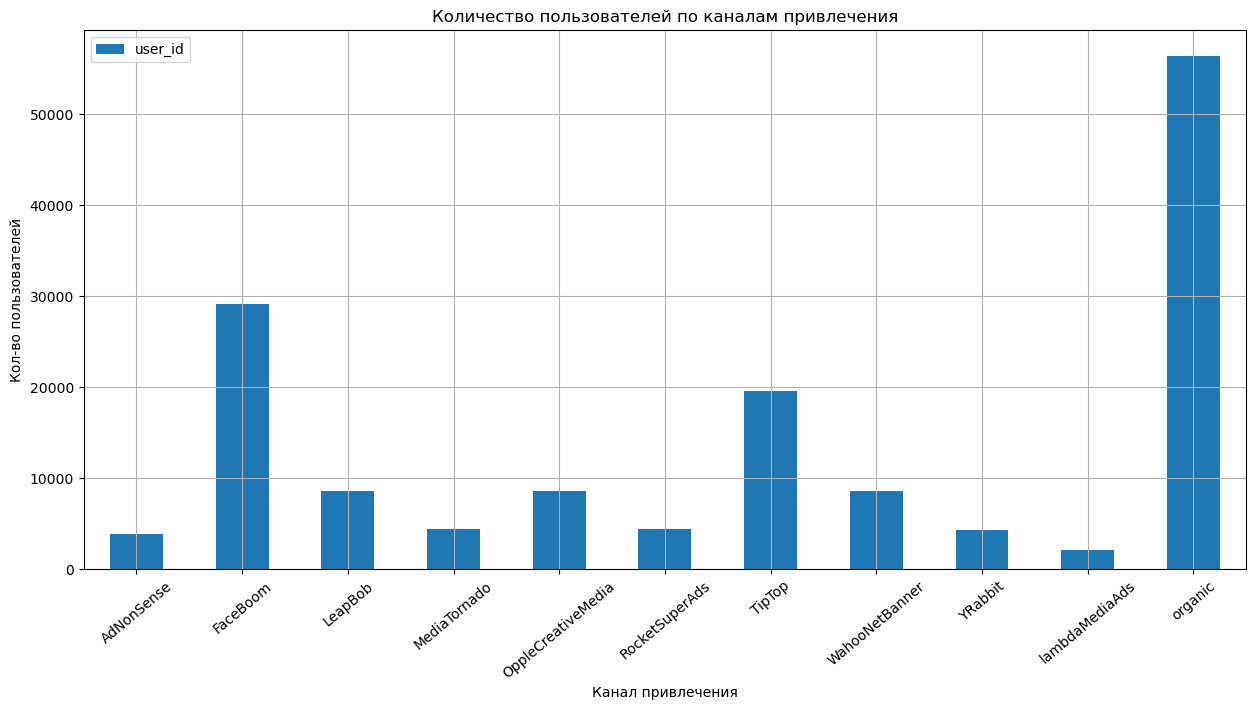

In [35]:
# построим график пользователей по каналам привлечения
profiles.pivot_table(
    index = 'channel', 
    values = 'user_id', 
    aggfunc = {'user_id':'count'}).plot(
    kind = 'bar',
    title = 'Количество пользователей по каналам привлечения',
    grid = True,
    xlabel = 'Канал привлечения',
    ylabel = 'Кол-во пользователей',
    figsize = (15, 7),
    rot = 40
)
plt.show()

График выше демонстрирует достаточно необычные результаты: наибольшее количество (~55 000 - свыше трети!) пользователей пришли самостоятельно, пока остальные каналы привлечения не достигают и 30 000. Заметны лидеры, а именно FaceBoom и TipTop: в сумме они едва ли достигнут 50 000 привлеченных пользователей. Остальные каналы не достигают и 10 000, что дастаточно низкий результат.  
На основе данного графика можно предварительно констатировать неэфективность большей части рекламных каналов привлечения, что усугубляется достаточно высоким показателем органического привлечения пользователей.

#### Промежуточные выводы
На основе общего анализа пользователей продукта Procrastinate Pro+ мы можем отметить достаточно стабильную динамику привлечения пользователей: в среднем около 25 000 пользователей в месяц, что показывает стабильность привлечения, однако при повышении рекламного бюджета отстутвие роста становится явной проблемой, что будет выявлено далее.  
Важно учитывать пользователей с точки зрения их регионов и устройств. Так, большую часть пользователей занимают жители США, что позволяет не исключать положительных прогнозов при выявлении источников убытков, т.к. США - одна из самых платежеспособных стран из категории Tier 1. Остальные страны занимают 1/3 от всех пользователей, но поскольку Германия, Франция и Соединенное Королевство так же из категории Tier 1, то в этом отношении требуется дополнительная работа по привлечению.  
С точки зрения устройств большая часть пользователей - владельцы iPhone. Немалая часть представлена пользователеями Android, что в целом подчеркивает принципиальную важность мобильных платформ для проекта, нежели десктопных.  
По каналам привлечения наибольшее число пользовтаелей пришло органически, а рекламные каналы привлечения не ревышают и 10 000, за исключением FaceBoom и TipTop, которые совокупно привлекли примерно тот же поток пользователей, что и органика. На данном этапе можно подтвердить серьезные проблемы с рекламой и ее эфективностью, что и становится причиной убытков.  
Для этого рассмотрим пользователей по когортам "платящие" и "неплатящие".

### Территориальный анализ пользователей платящей когорты
Поскольку основная проблема продуктовой команды связана с дисбалансом вложений в рекламу, целесооборазно подробнее проанализировать платящих пользователей и их профили для выявления блокирующих моментов развития.  
Рассмотрим платящих пользователей в их распределении по странам.

In [36]:
# объявим функцию вывода сводной таблицы по доле платящих пользователей по заданному критерию
def get_share_table(df, col):
    # создаем сводную таблицу по когорте с платящими пользователеями
    paying_slice = df.query('payer == True').pivot_table(
    index = col,
    values = 'user_id',
    aggfunc = {'user_id': 'count'}
).rename(columns={'user_id': 'paying_num'}).reset_index(drop=False)
    # создаем сводную таблицу с неплатящими пользователеями по странам
    non_paying_slice = df.query('payer == False').pivot_table(
    index = col,
    values = 'user_id',
    aggfunc = {'user_id': 'count'}
).rename(columns={'user_id': 'non_paying_num'})
    # создаем сводную таблицу со всеми пользователеями по странам
    criterion = df.pivot_table(
    index = col,
    values = 'user_id',
    aggfunc = {'user_id': 'count'}
).rename(columns={'user_id': 'total'})
    # объединяем таблицы по регионам
    criterion = criterion.merge(non_paying_slice, how='left', on=criterion.index).rename(columns={'key_0': col})
    criterion = criterion.merge(paying_slice, how='left', on=col)
    # добавляем столбец с процентами платящих от общего числа пользователей
    criterion['paying_%'] = criterion['paying_num'] / criterion['total'] * 100
    criterion['paying_%'] = criterion['paying_%'].map('{:,.2f}%'.format)
    display(criterion.sort_values(by='paying_%', ascending=False).reset_index(drop=True))
    return criterion

In [37]:
# выведем таблицу платящих по странам
countries = get_share_table(profiles, 'region')

region   total  non_paying_num  paying_num paying_%
0  United States  100002           93100        6902    6.90%
1        Germany   14981           14365         616    4.11%
2             UK   17575           16875         700    3.98%
3         France   17450           16787         663    3.80%

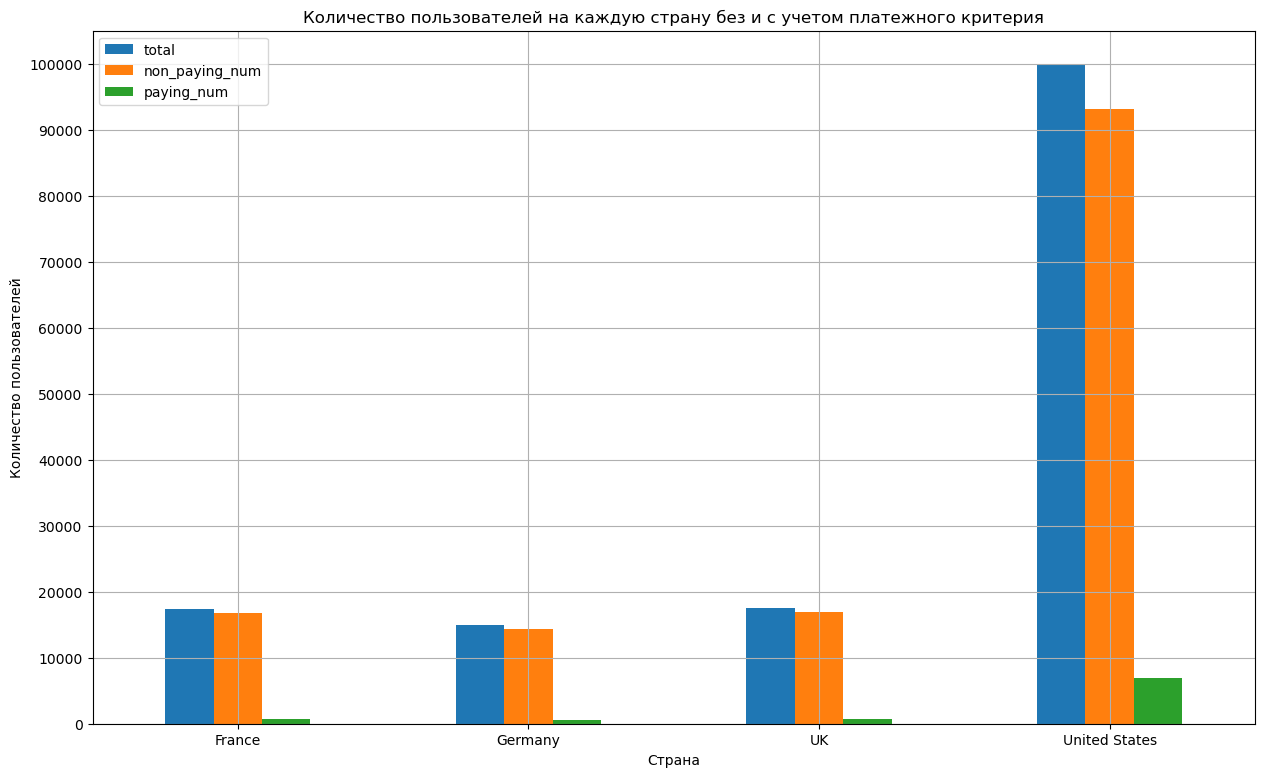

In [38]:
# дополним таблицу визуализацией
countries.plot(
    kind='bar', 
    x = 'region',
    y = ['total', 'non_paying_num', 'paying_num'],
    grid = True,
    figsize = (15, 9),
    rot = 0,
    title = 'Количество пользователей на каждую страну без и с учетом платежного критерия',
    xlabel = 'Страна',
    ylabel = 'Количество пользователей',
    yticks = (np.arange(0, 100001, 10000))
)

plt.show()

#### Промежуточные выводы
Как таблица, так и график демонстрируют неутешительные результаты: доля платящих пользователей в каждой из стран не превышает и 10%, что свидетельствует о низкой конверсии в покупку, что уже сейчас можно выделить как одну из основных метрик для пристального фокуса команды.  
Если рассматривать детально, то США ожмдаемо лидируют по количеству платящих пользователей - 6 902 пользователя (или ~7% от общего числа). Данный рынок, как и отмечалось, выступает самым прибыльным и большая часть пользователей именно из США. Пользователей из Европы существенно меньше, что связано и с общей долей пользователей на фоне США, и сранительно низкой долей платящих пользователей от всех - ~4%.  
Рассмотрим теперь какие устройства используют преимущественно платящие пользователи.

###  Анализ платформ пользователей платящей когорты
Создадим аналогичную сводную таблицу по устройствам пользователей.

In [39]:
# выведем таблицу платящих по устройствам
platforms = get_share_table(profiles, 'device')

device  total  non_paying_num  paying_num paying_%
0      Mac  30042           28130        1912    6.36%
1   iPhone  54479           51097        3382    6.21%
2  Android  35032           32982        2050    5.85%
3       PC  30455           28918        1537    5.05%

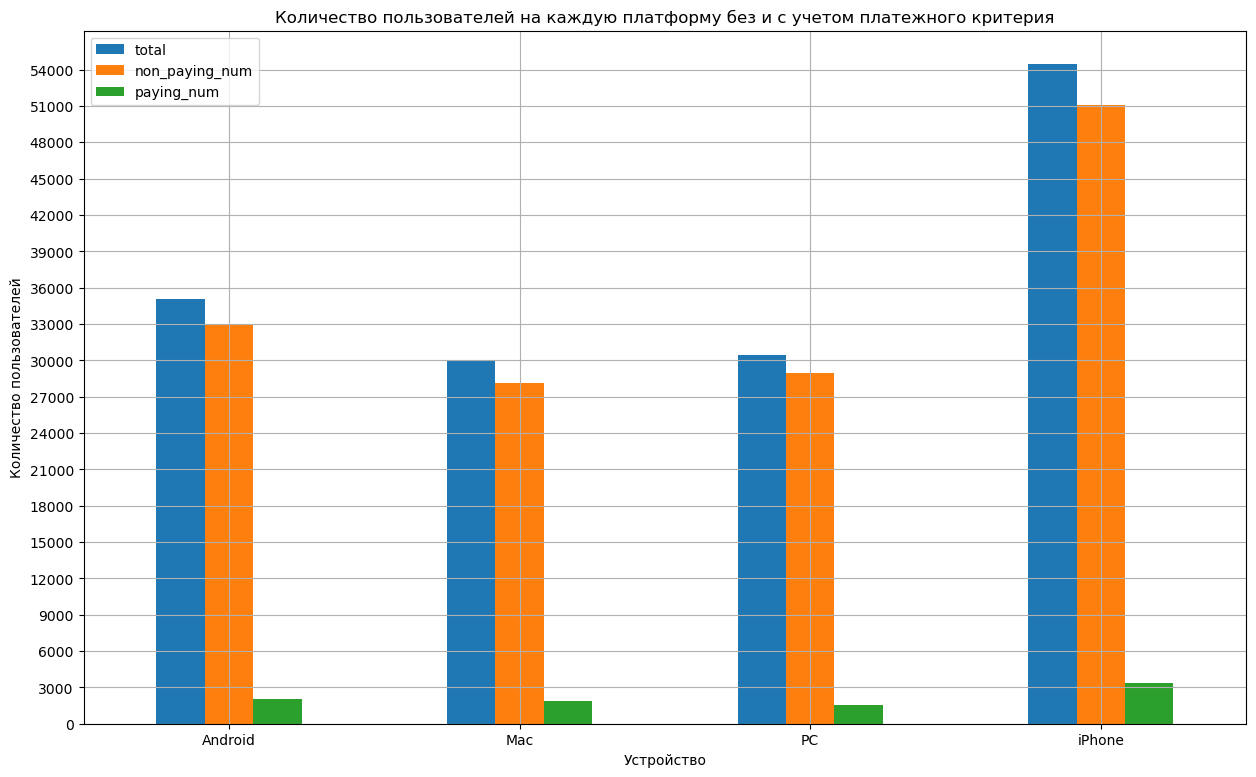

In [40]:
# дополним сводную таблицу визуализацией
platforms.plot(
    kind='bar', 
    x = 'device',
    y = ['total', 'non_paying_num', 'paying_num'],
    grid = True,
    figsize = (15, 9),
    rot = 0,
    title = 'Количество пользователей на каждую платформу без и с учетом платежного критерия',
    xlabel = 'Устройство',
    ylabel = 'Количество пользователей',
    yticks = (np.arange(0, 55001, 3000))
)

plt.show()

#### Промежуточные выводы
Результаты распределения платящих пользователей по устройствам демонстрируют достаточно однорудную долю платящих пользователей: для каждого устройства процент платящих составляет около 5-6%, что свидетельствует об однородности конверсии в покупку относительно устройств. Разумеется, пользователей на iPhone почти два раза больше, чем пользователей с любой другой платформы, что и дает более высокий показатель плательщиков на данной платформе, однако процент конвертации в покупку соразмерен остальным платформам. Если ожидать высокие показатели от мобильных платформ, как данность рынка, то тогда можно было бы ожидать более высокие цифры, а следовательно, и конверсию, у Android, однако данную гипотезу еще требуется проверить, а пока Android превышает десктопные платформы немногим больше 5 000, что в отношении платящих пользователей создает невысокую разницу. Что касается настольных платформ, то они, как и в общем анализе пользователей, демонстрируют схожий результат: от 1 500 до 2 000 платящих пользователей на 30 000 ото всех.  
В качестве дополнения, можно заметить некоторую закономерность: пользователи устройтсв Apple чаще конвертируются в покупку, чем продукты других компаний, однако мобильные платформы лучше конвертируются в покупку, нежели настольные платформы.

###  Анализ источников привлечения пользователей платящей когорты
Создадим аналогичную сводную таблицу по источникам привлечения пользователей.

In [41]:
# выведем таблицу платящих по каналам привлечения
channels = get_share_table(profiles, 'channel')

channel  total  non_paying_num  paying_num paying_%
0               TipTop  19561           17683        1878    9.60%
1       RocketSuperAds   4448            4096         352    7.91%
2       WahooNetBanner   8553            8100         453    5.30%
3              YRabbit   4312            4147         165    3.83%
4         MediaTornado   4364            4208         156    3.57%
5              LeapBob   8553            8291         262    3.06%
6   OppleCreativeMedia   8605            8372         233    2.71%
7              organic  56439           55279        1160    2.06%
8             FaceBoom  29144           25587        3557   12.20%
9           AdNonSense   3880            3440         440   11.34%
10      lambdaMediaAds   2149            1924         225   10.47%

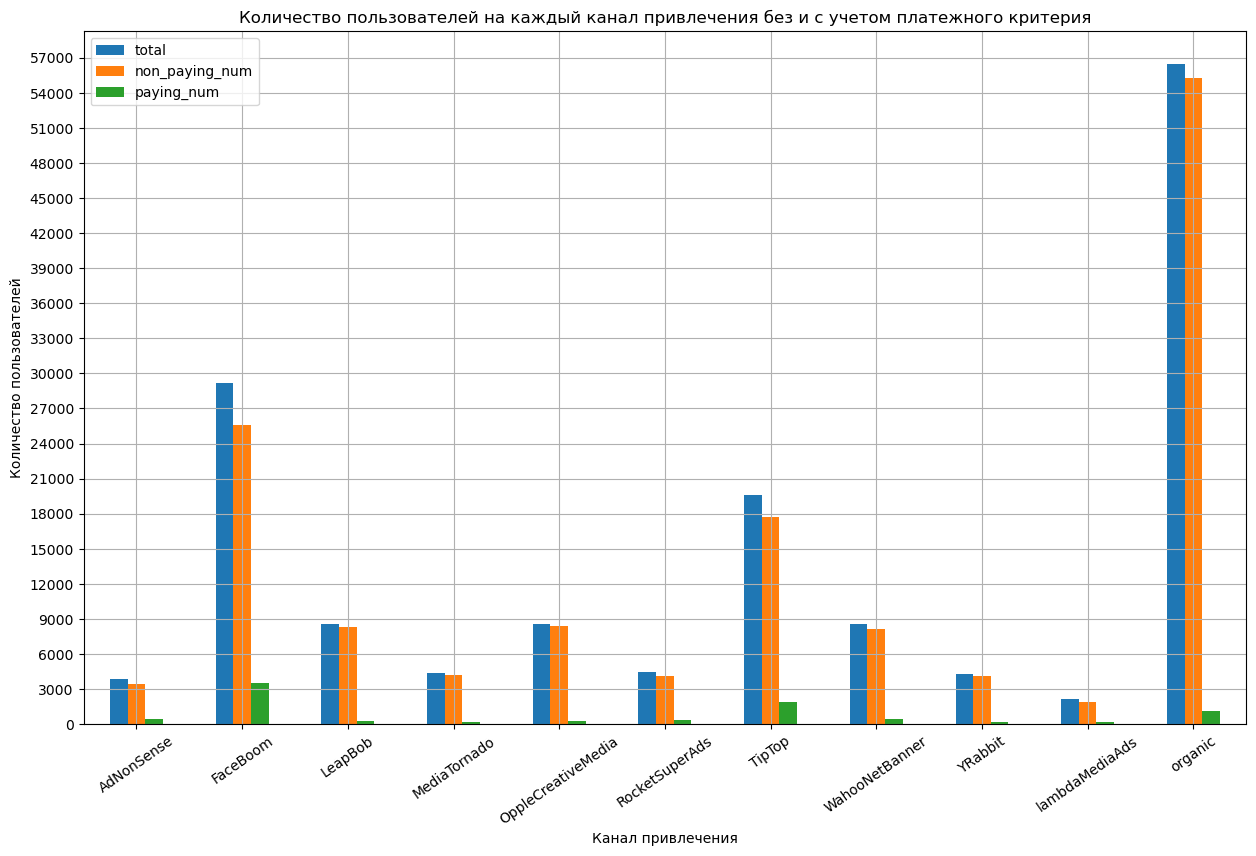

In [42]:
# дополним сводную таблицу визуализацией
channels.plot(
    kind='bar', 
    x = 'channel',
    y = ['total', 'non_paying_num', 'paying_num'],
    grid = True,
    figsize = (15, 9),
    rot = 35,
    title = 'Количество пользователей на каждый канал привлечения без и с учетом платежного критерия',
    xlabel = 'Канал привлечения',
    ylabel = 'Количество пользователей',
    yticks = (np.arange(0, 57001, 3000))
)

plt.show()

#### Промежуточные выводы
В результате выявления доли платящих пользователей от общего числа по исчтонику привлечения мы можем сразу же отметить, что органические переходы, хоть и являются наиболее массивными, неохотно конвертируются в покупку - около 2% от общего потока по источнику. Наоборот, менее высокие показатели общего числа пользователей у таких источников привлечения, как FaceBoom и TipTop (29 и 19 тыс. соответственно), намного успешнее конвертируются в покупки - 12% и 9% соответственно. Это лидирующие источники по количеству и качеству привлечения пользователей. Дополнительно следует отметить AdNonSense и lambdaMediaAds в качестве лидирующих каналов по конверсии, однако им недостает числа общего привлечения. Остальные источники привлечения заметно уступают вышеупомянутым лидерам либо по числу общего привлечения, либо по проценту конвертирования пользователей в покупателей.

------------------------------------------------------

## Этап 4. Анализ маркетинговых показателей
Как мы знаем, основной тревогой команды выступают убытки на фоне немалых вложений в рекламу. По этой причине нам следует соотнести полученные результаты анализа платящих пользователей соотнести с анализом маркетинговых показателей. Для этого нам потребуется рассмотреть расходы на источники привлечения, сравнить стоимость приобретенных клиентов. Таким образом, сравнивая затраты и эффект от них, мы сможем выявить проблемные точки и помочь скорректировать маркетинговую стартегию команды.  
Начнем с подсчета общей суммы расходов на рекламу.

In [43]:
# создадим сводную таблицу по затратам на рекламные источники
cost_per_channel = costs.pivot_table(
    index = 'channel',
    values = 'costs',
    aggfunc = {'costs': 'sum'}
)

# выведем общие траты на рекламу
display('Общие траты на рекламу: {:.1f}'.format(cost_per_channel['costs'].sum()))

# создадим новый столбец в сводной таблицей с долей каждого источника от общего бюджета
cost_per_channel['share'] = cost_per_channel['costs'] / cost_per_channel['costs'].sum() * 100
cost_per_channel['share'] = cost_per_channel['share'].round(decimals=1)
cost_per_channel.sort_values(by='share', ascending=False)

'Общие траты на рекламу: 105497.3'

costs  share
channel                            
TipTop              54751.30   51.9
FaceBoom            32445.60   30.8
WahooNetBanner       5151.00    4.9
AdNonSense           3911.25    3.7
OppleCreativeMedia   2151.25    2.0
LeapBob              1797.60    1.7
RocketSuperAds       1833.00    1.7
lambdaMediaAds       1557.60    1.5
MediaTornado          954.48    0.9
YRabbit               944.22    0.9

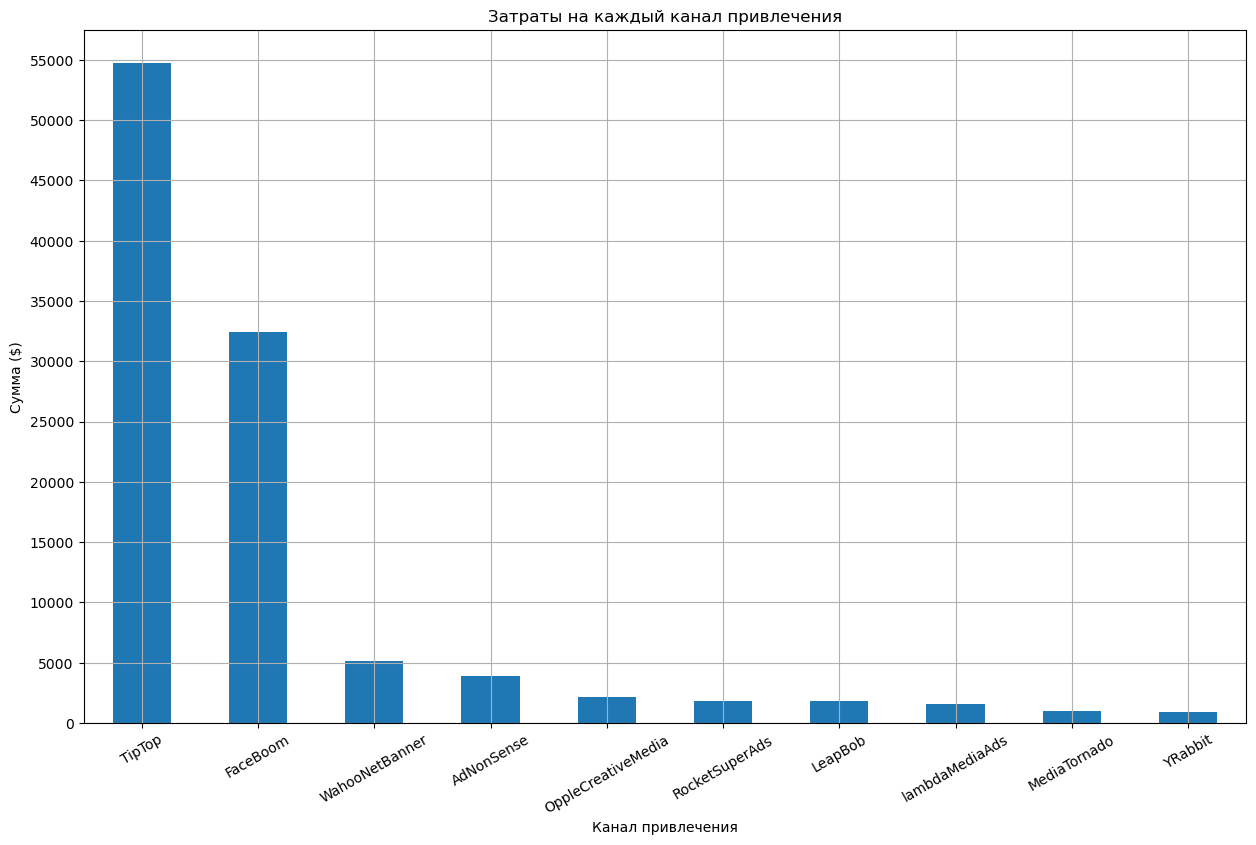

In [44]:
# визуализируем распределение трат по источникам
cost_per_channel['costs'].sort_values(ascending=False).plot(
    kind='bar', 
    grid = True,
    figsize = (15, 9),
    rot = 30,
    title = 'Затраты на каждый канал привлечения',
    xlabel = 'Канал привлечения',
    ylabel = 'Сумма ($)',
    yticks = (np.arange(0, 55001, 5000))
)

plt.show()

С точки зрения маркетингового бюджета из 105 497.3$, затраченных за полгода, наибольшую часть (около 80%) занимают такие источники, как FaceBoom и TipTop, отняв 51% и 30% бюджета соответственно. Остальные каналы занимают менее 20% ото всего бюджета. В целом лидеры те же, что и при срезе наиболее качественных каналов привлечения, однако здесь мы не учли стоимость привлечения и динамику изменения расходов.  
Для этого построим выясним, какова динамика изменения расходов понедельно и помесячно.

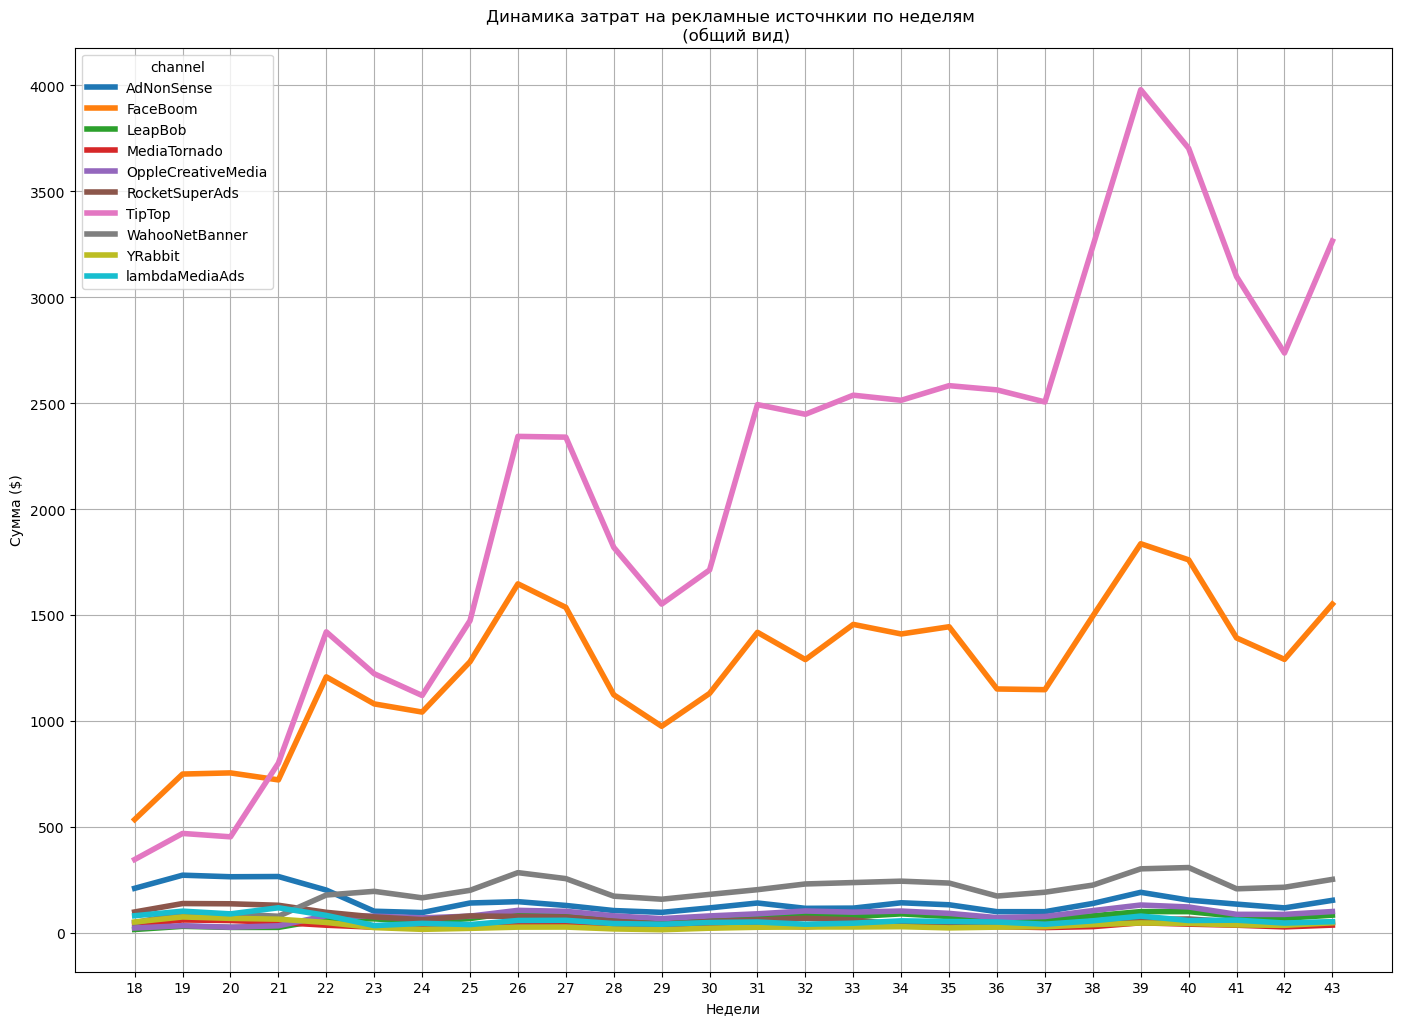

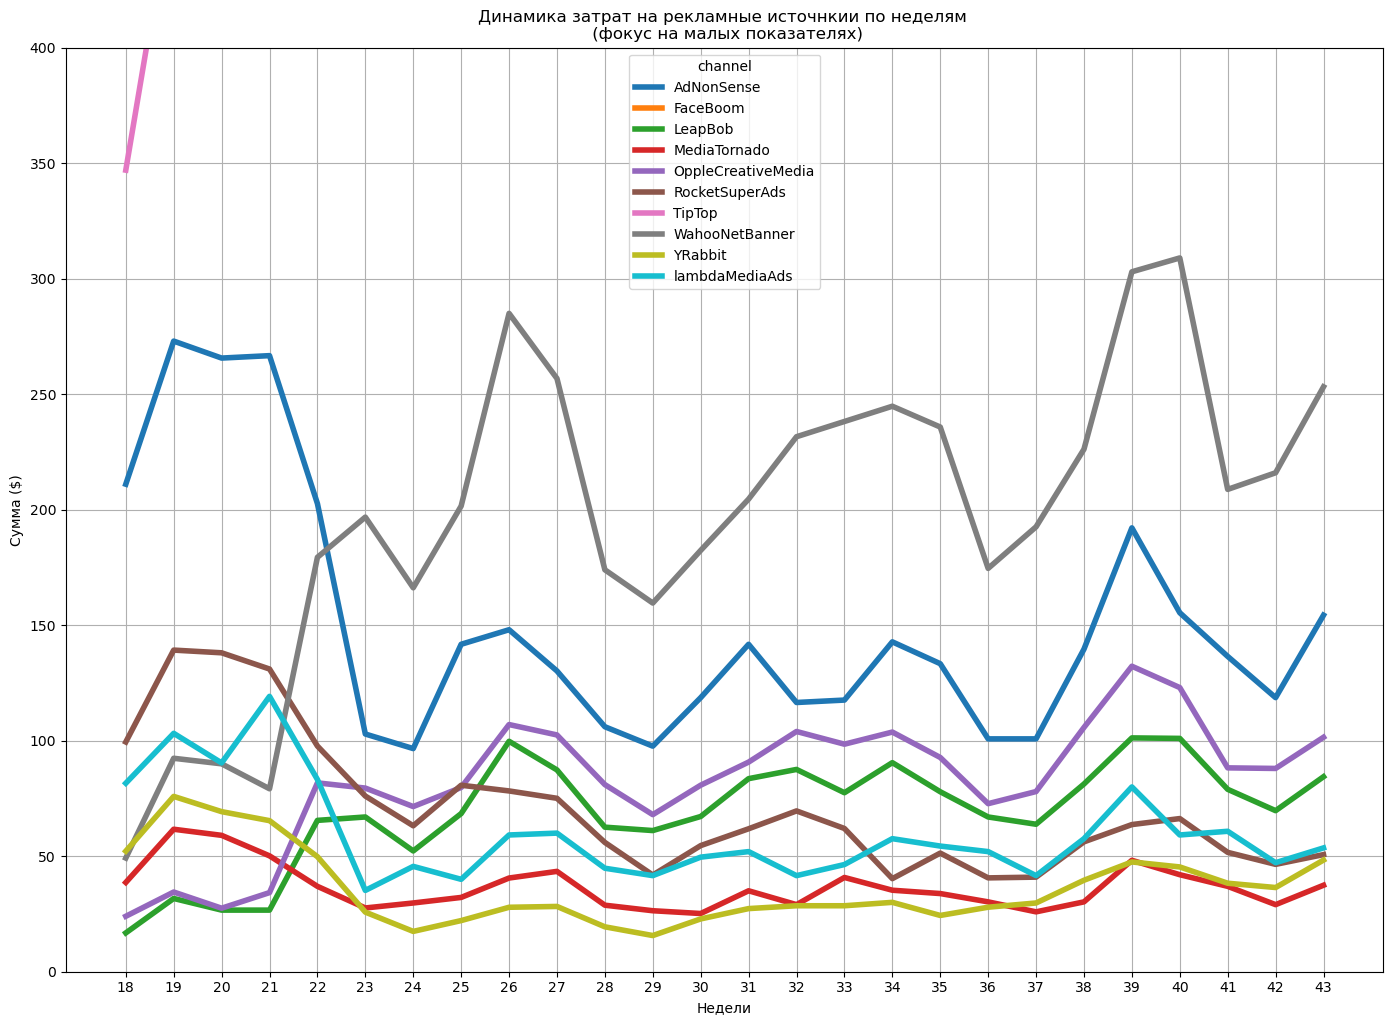

In [45]:
# дополним датафрейм затарт номерами недель года
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

# создаем сводную таблцу с источниками и понедельными затратами
costs_weekly = costs.pivot_table(
    index = 'week',
    columns = 'channel',
    values = 'costs',
    aggfunc = {'costs': 'sum'}
)

# визуализируем траты на каждый источник по неделям
costs_weekly.plot(
    kind = 'line',
    figsize = (17, 12),
    grid = True,
    linewidth = 4,
    xticks = np.arange(18, 44),
    xlabel = 'Недели',
    ylabel = 'Сумма ($)',
    title = 'Динамика затрат на рекламные источнкии по неделям \n (общий вид)'
)

# дополним визуализацию меньшим масштабом для фокуса на скоплении
costs_weekly.plot(
    kind = 'line',
    figsize = (17, 12),
    grid = True,
    linewidth = 4,
    xticks = np.arange(18, 44),
    xlabel = 'Недели',
    ylabel = 'Сумма ($)',
    title = 'Динамика затрат на рекламные источнкии по неделям \n (фокус на малых показателях)',
    ylim = [0, 400]
)

plt.show()

Дополним визуализацию помесячным разбиением затрат.

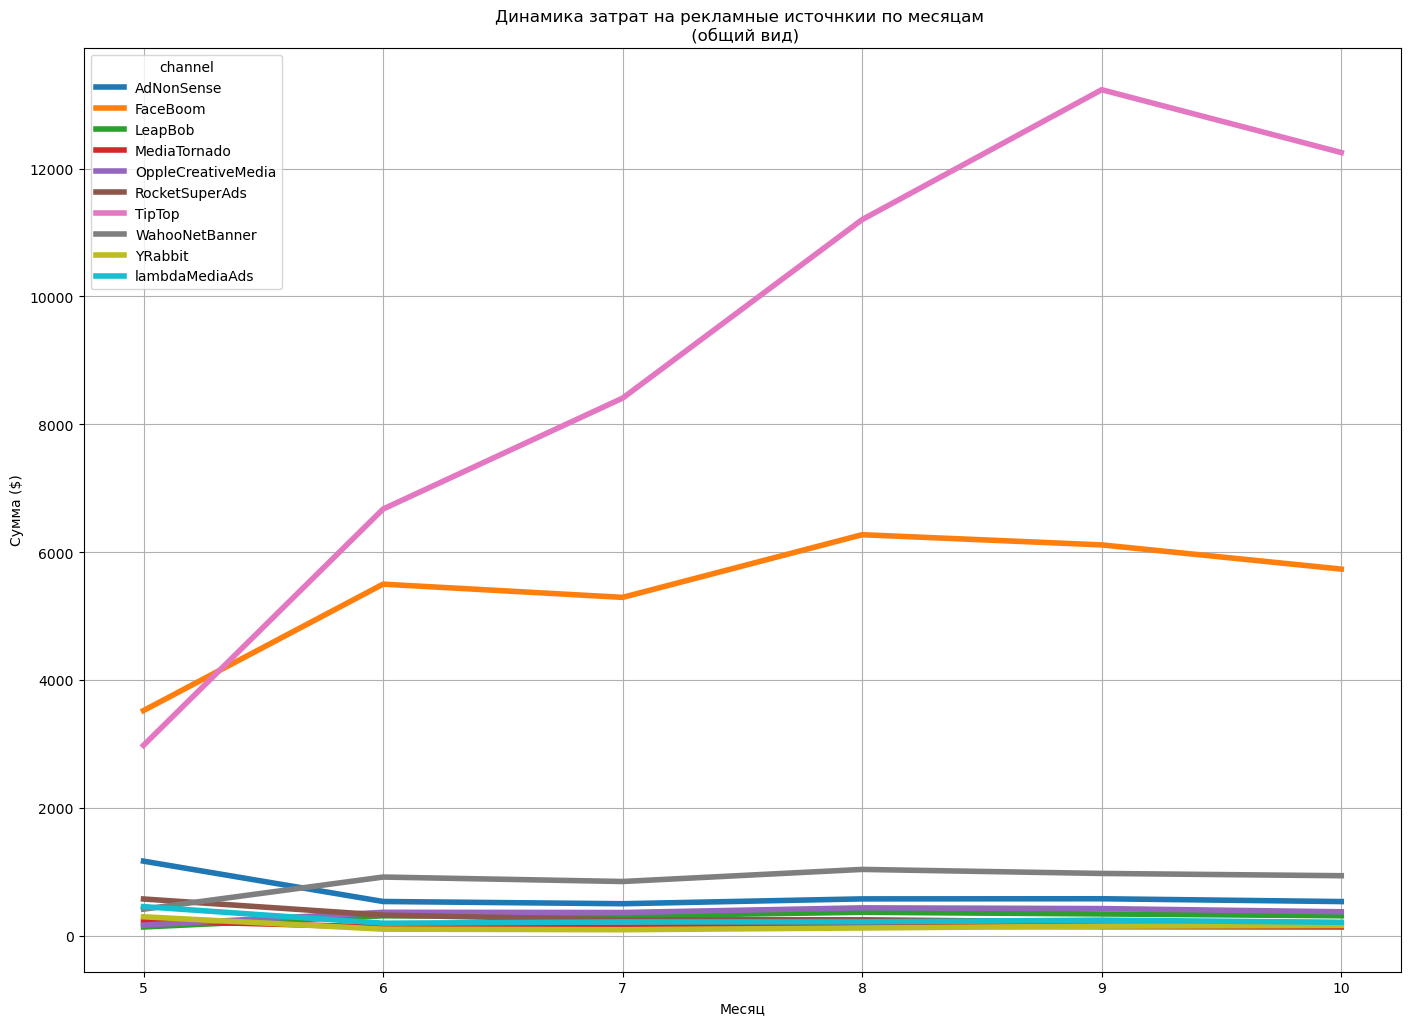

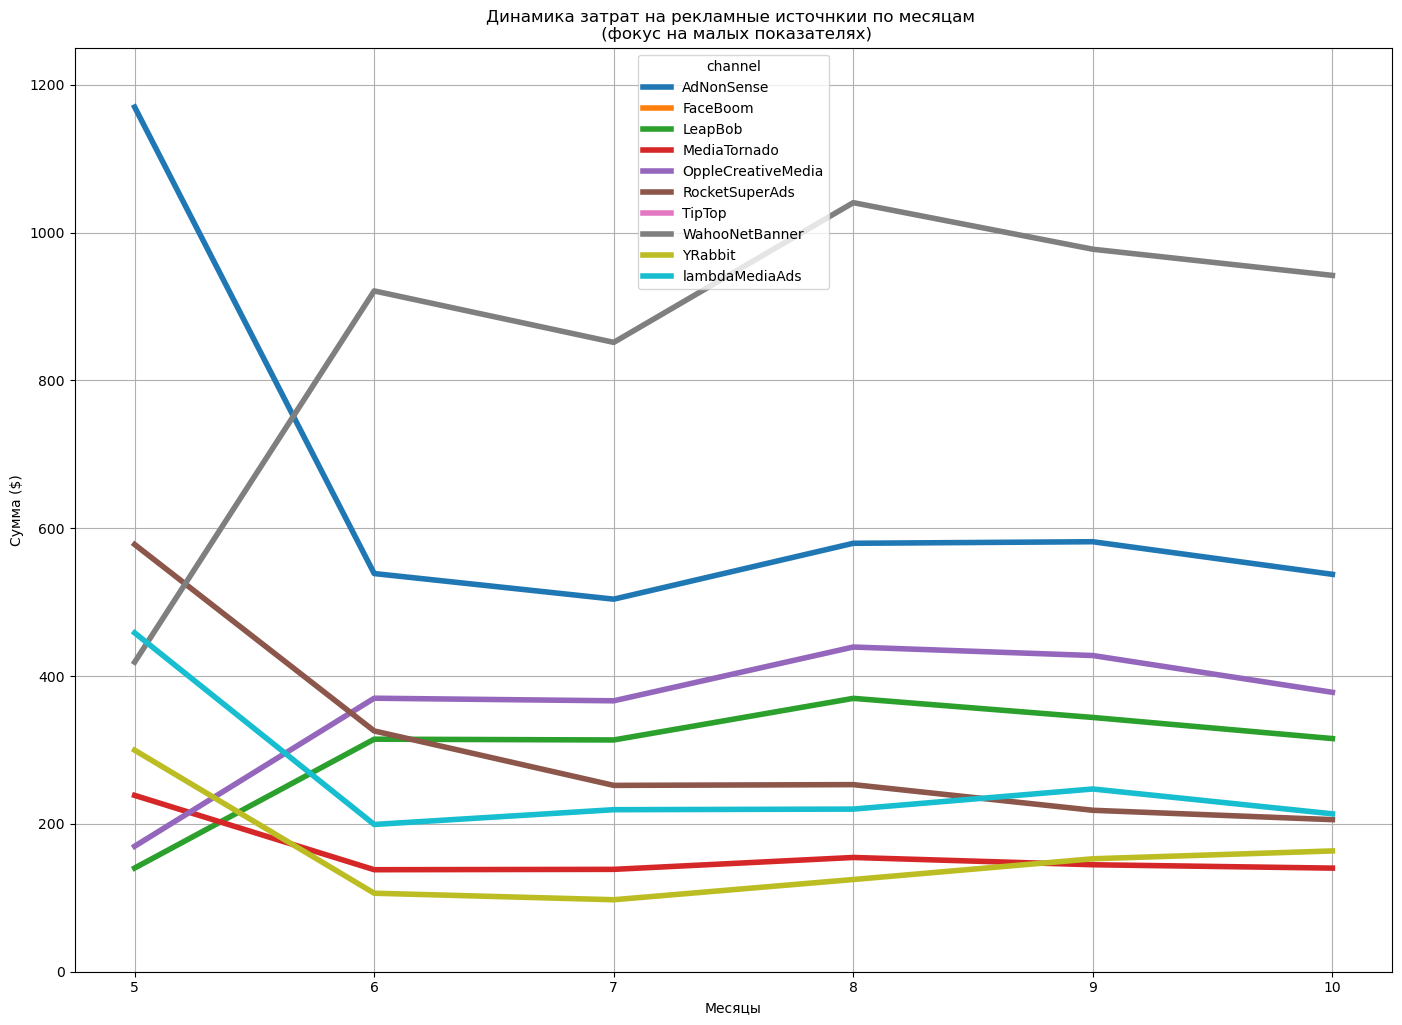

In [46]:
# дополним датафрейм затрат номерами месяцев года
costs['month'] = pd.to_datetime(costs['dt']).dt.month

# создаем сводную таблцу с источниками и помесячными затратами
costs_monthly = costs.pivot_table(
    index = 'month',
    columns = 'channel',
    values = 'costs',
    aggfunc = {'costs': 'sum'}
)

# визуализируем траты на каждый источник по неделям
costs_monthly.plot(
    kind = 'line',
    figsize = (17, 12),
    grid = True,
    linewidth = 4,
    xticks = np.arange(5, 11),
    xlabel = 'Месяц',
    ylabel = 'Сумма ($)',
    title = 'Динамика затрат на рекламные источнкии по месяцам \n (общий вид)'
)

# дополним визуализацию меньшим масштабом для фокуса на скоплении
costs_monthly.plot(
    kind = 'line',
    figsize = (17, 12),
    grid = True,
    linewidth = 4,
    xticks = np.arange(5, 11),
    xlabel = 'Месяцы',
    ylabel = 'Сумма ($)',
    title = 'Динамика затрат на рекламные источнкии по месяцам \n (фокус на малых показателях)',
    ylim = [0, 1250]
)

plt.show()

Как мы видим, динамаика затрат неоднородна: поскольку FaceBoom и TipTop занимают 80% бюджета, то итренды уходят от остальных затрат. Если фокусироваться только на лидерах, то мы можем увидеть очевидный тренд на повышение затрат, где пик достигается на 39 неделю. Этому же тренду и вторят прочие рекламные источники: 39 неделя стала самой крупной по вложениям для подовляющего большинства рекламных источников. Можно предположить, что на волненеплохих показателей было принято стратегическое решение резко увеличить вложения в маркетинг. Однако динамика затрат не открывает все аспекты продвижения и эффекта от него. Рассмотрим стоимость привлечения.

In [47]:
# выясним, сколько стоит привлечение одного пользователя из разных источников
acq_per_channel = profiles.pivot_table(
    index = 'channel',
    values = 'acquisition_cost',
    aggfunc = {'acquisition_cost': 'mean'}
)
acq_per_channel.sort_values(by='acquisition_cost', ascending=False).round(decimals=2)

acquisition_cost
channel                             
TipTop                          2.80
FaceBoom                        1.11
AdNonSense                      1.01
lambdaMediaAds                  0.72
WahooNetBanner                  0.60
RocketSuperAds                  0.41
OppleCreativeMedia              0.25
YRabbit                         0.22
MediaTornado                    0.22
LeapBob                         0.21
organic                         0.00

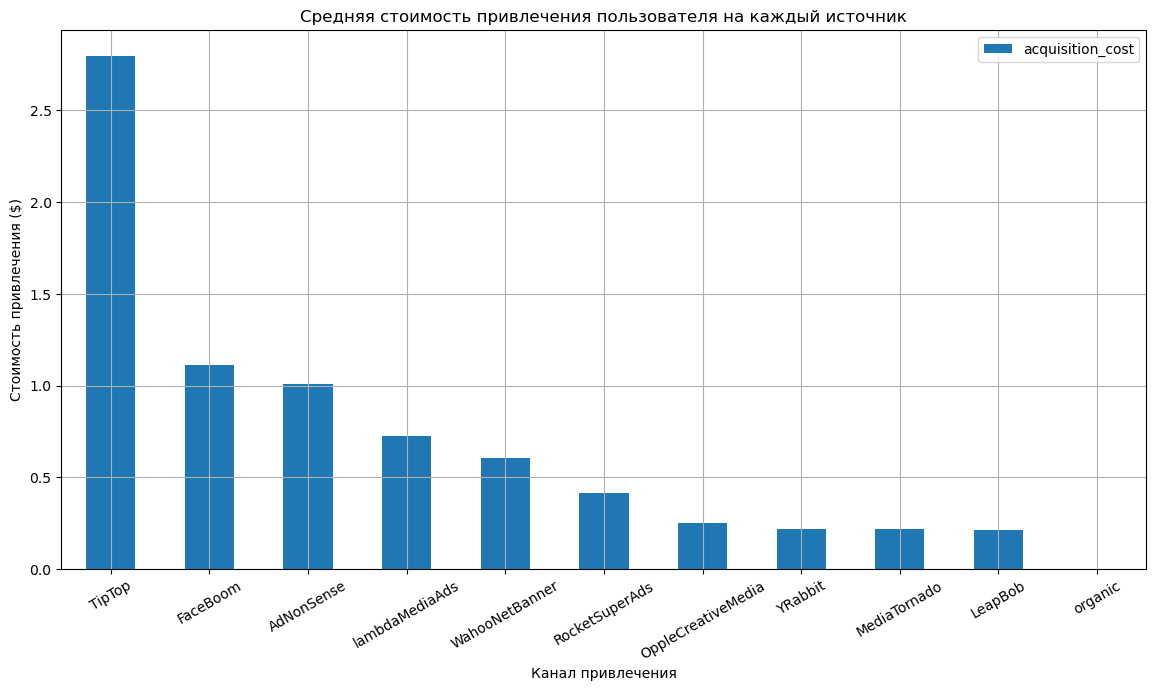

In [48]:
# дополним результаты визуализацией
acq_per_channel.sort_values(by='acquisition_cost', ascending=False).plot(
    kind = 'bar', 
    figsize = (14, 7), 
    rot = 30, 
    grid = True, 
    xlabel = 'Канал привлечения', 
    ylabel = 'Стоимость привлечения ($)',
    title = 'Средняя стоимость привлечения пользователя на каждый источник'
)
plt.show()

В лидерах мы наблюдаем те же каналы: TipTop и FaceBoom. В особенности стоит отметить крайне высокую стоимость привлечения через TipTop - здесь стоимость привлечения в 2,5 раза выше, чем у FaceBoom при условии, что FaceBoom привлекает на треть больше в общем выражении, и в два раза больше платящих пользователей. Здесь очевиден неверный приоритет влодений в самые эффективные источники привлечения. Дополнительно стоит отметить канал AdNonSense, который стоит примерно столько же, сколько и FaceBoom, но привлекает в 10 раз меньше. Такое разительное отлчиие смягчается высоким процентом конверсии, что дает возможную алтернативу для смену распределения маркетингового бюджета.


### Промежуточные выводы
Учитывая полученные результаты анализа маркетинговых затарт продукта Procrastinate Pro+ за полгода, мы можем подчеркнуть нерелеватный результативности отдельных источников привлечения приоритет трат рекламного бюджета: далеко не все эффективные источники привлечения получают соразмерные вложения. Так, среди наиболее качественных (т.е. привлечкающих более платящую аудиторию) источников числятся:  
- FaceBoom
- AdNonSense
- lambdaMediaAds

В то время как ниболее затратоемкиими каналами выступают:  
- TipTop
- FaceBoom
- WahooNetBanner

Таким образом, (исключая FaceBoom) большие вложения приходятся на не самые эффективные каналы.
Дополнительно, следует отметить вероятную причину растущих убытков команды: TipTop на протяжении всего отчетного периода повышал затарты, достигая к сентябрю отметки свыше 12 000 $. Можно предположить, что показы по данному источнику не отслеживались командой, а они росли, увеличивая затарты как минимум в 2 раза быстрее остальных источников при среденей конвертируемости в покупку. В итоге, при достижении пика затрат в сентябре команда начала фиксировать убытки. 

В качестве варианта выхода из момента убыточности следует предложить такие меры:
- увеличить/сохранить вложения в источник привлечения FaceBoom,
- снизить и контролировать вложения в TipTop как в наиболее дорогой источник со средним показателем конвертируемости,
- повысить вложения в каналы с высоким процентом конвертируемости, а именно AdNonSense и lambdaMediaAds,
- проверить адаптированность продукта под европейский регион (например, язык),
- проверить работу продукта на десктопных платформах. 


-------------------------------------------

## Этап 5. Оценка окупаемости рекламных вложений
Одного анализа каналов привлечения будет недостаточно для взвешенных выводов о сложившейся ситуации с продуктом ProcrastinatePro+ - потребуется оценить базовые метрики, а именно LTV, ROI и CAC и другие. В соответствии с бизнес-планом пользователи окупаются в течение 2 недель с дня привлечения. Включать пользователей, привлеченных органическим путем, мы не будем, т.к. они по умолчанию как минимум не подразумевают издержки, тем более они не связаны с рекламными вложениями, поэтому оценивать данную когорту будет нелогично с точки зрения маркетинга. По этой причине создадим отдельный срез датафрейма `profiles`.  

Учитывая описанное выше, мы высчитываем метрики на 01.11.2019. Начнем с общей окупаемости рекламы на основе LTV, ROI и CAC.

In [49]:
# зададим горизонт и момент анализа, а также срез профилей без органических пользователей
analysis_moment = datetime(2019, 11, 1).date()
analysis_horizon = 14
non_organic_profiles = profiles[profiles['channel'] != 'organic']

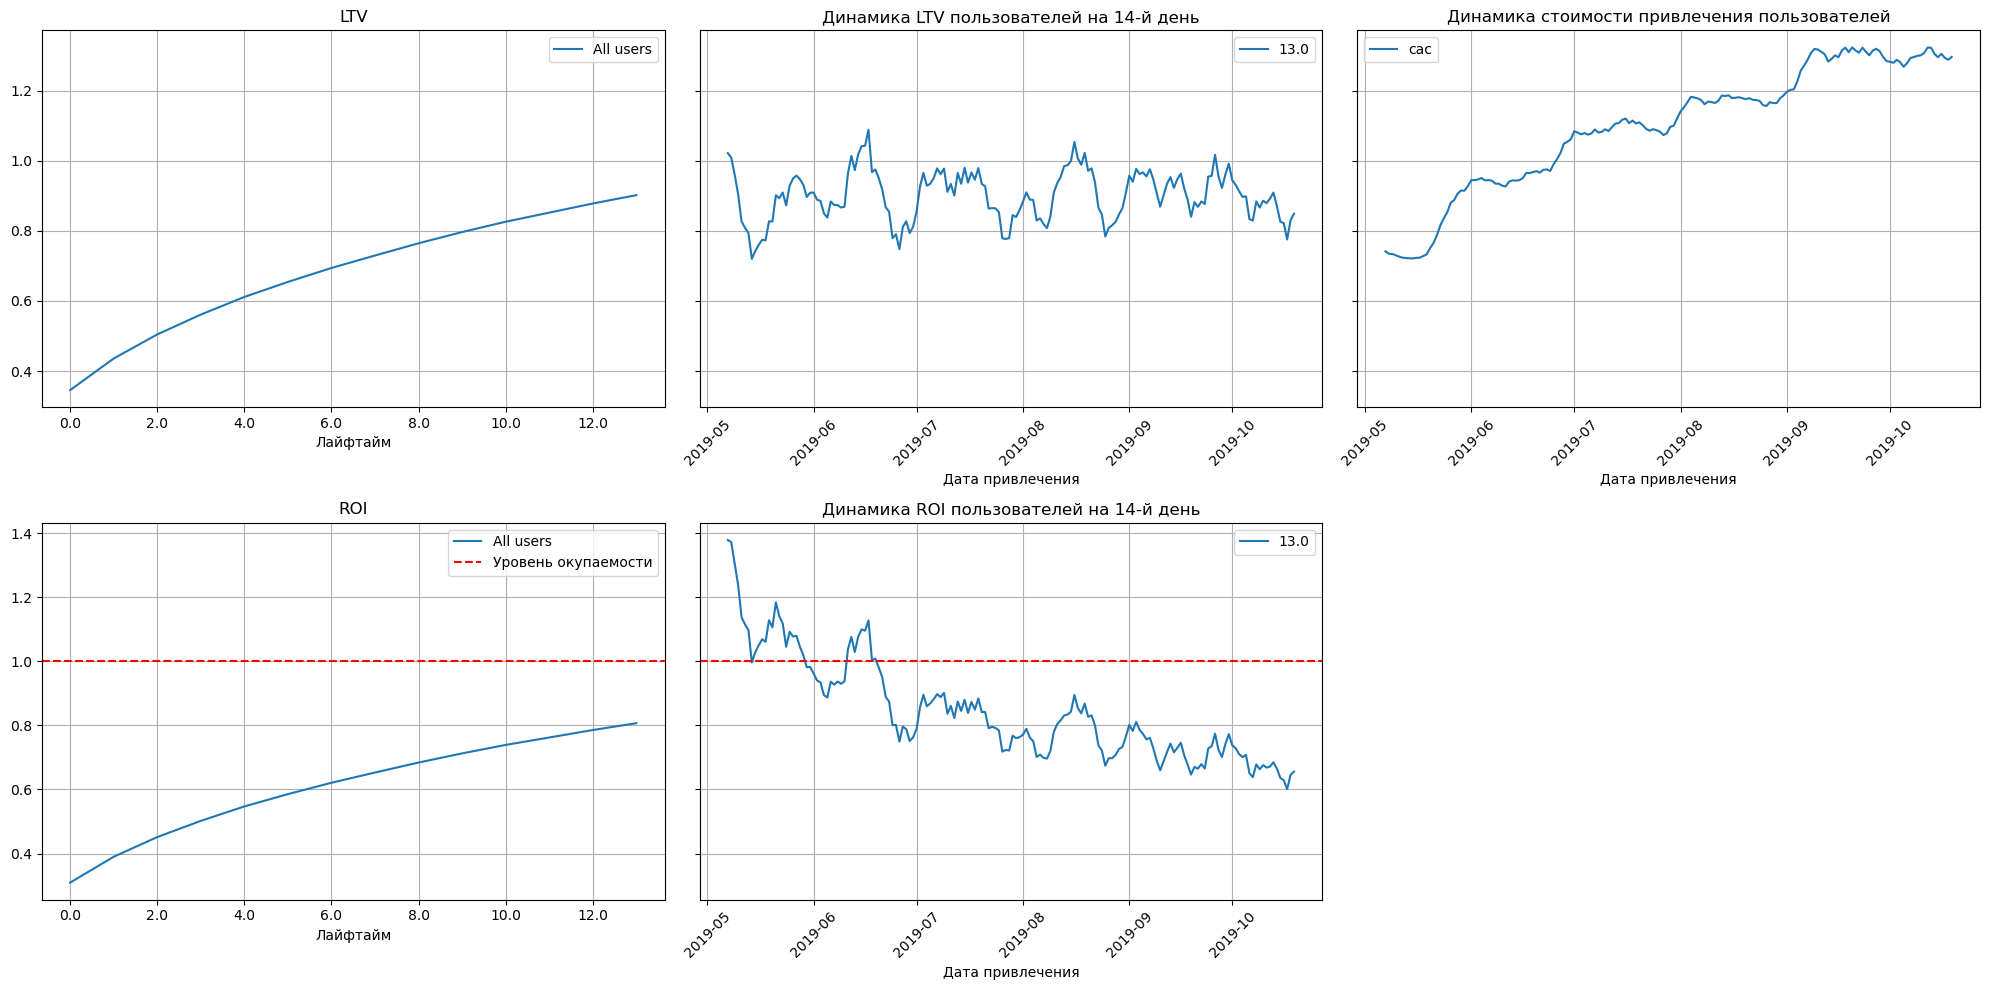

In [50]:
# используем функцию get_ltv(), чтобы получить метрики 14-ого дня
ltv_raw_14, ltv_14, ltv_in_time_14, roi_14, roi_in_time_14 = get_ltv(
    profiles = non_organic_profiles,
    purchases = orders,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon
)

# визуализируем результат через функцию plot_ltv_roi()
plot_ltv_roi(ltv_14, ltv_in_time_14, roi_14, roi_in_time_14, analysis_horizon)
plt.show()

Как мы видим, ROI не поднимается выше уровня окупаемости, его динамика имеет постепенный спад, что свидетельствует об однозначной неокупаемости вложений в рекламу. Дополняет картину и восходящий тренд CAC, и уровень LTV, находящийся ниже уровня окупаемости, что прямо отражает графики ROI: затраты на привлечение достаточно стремительно растут (особенно в последнюю неделю), а LTV так и не достигает уровня самоокупаемости. Мы наблюдаем явное несоответствие бизнес-плану окупаемости в пределах 2 недель.  
Дополним наблюдения графиками конверсии в покупку и удержания.

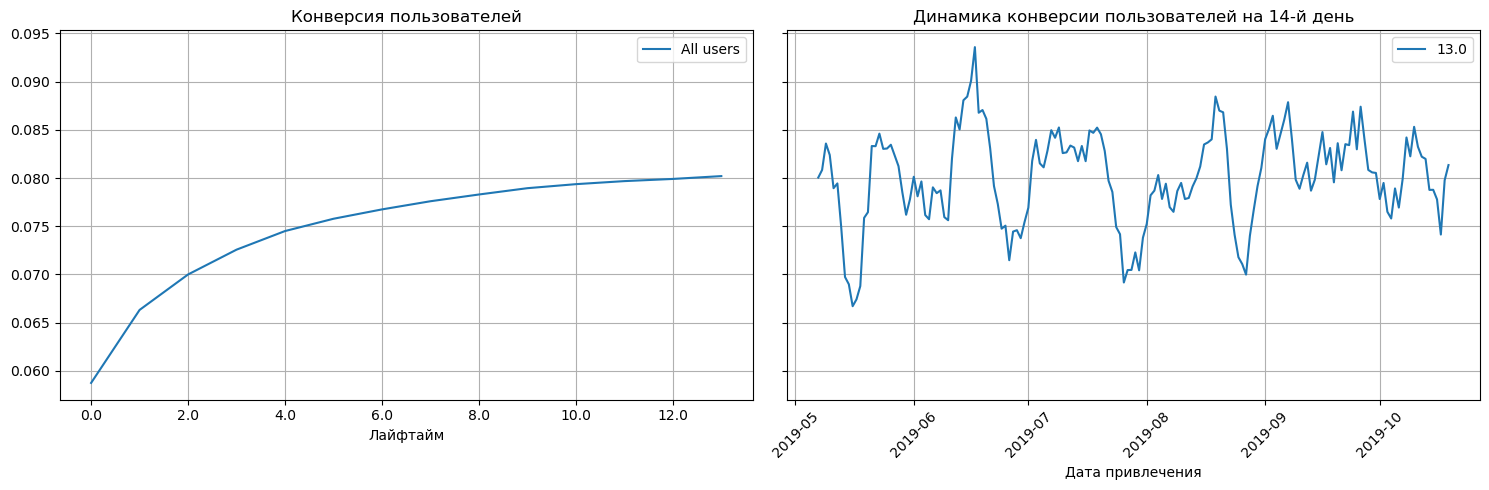

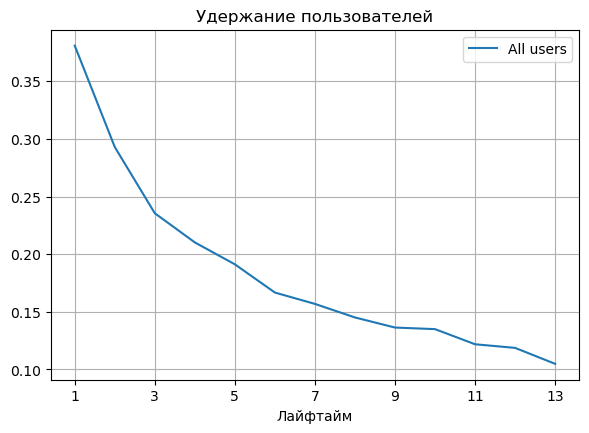

In [51]:
# высчитаем конверсию 14-ого дня
cr_raw_14, cr_14, cr_in_time_14 = get_conversion(
    profiles = non_organic_profiles,
    purchases = orders,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon
)

# дополнительно высчитаем удержание 14-ого дня
retention_raw_14, retention_14, retention_in_time_14 = get_retention(
    profiles = non_organic_profiles,
    sessions = visits,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon
)

# визуализируем результат
plot_conversion(cr_14, cr_in_time_14, horizon=analysis_horizon)
plot_retention(retention = retention_14, retention_history = retention_in_time_14, horizon = analysis_horizon)
plt.title('Удержание пользователей')
plt.show()

Конверсия так же не внушает оптимизма: показатель 8% мало для высокой окупаемости продукта. Несмотря на постпенный рост показателя, конверсию омрачает сильная волатильность динамики с частыми падениями, что свидетельствует о нестабильности поведения пользователей. Такие резкие скачки часто связаны с внешними факторами, сильно влияющими на конечное решение о покупке. Дополняет конверсию и удержание: мы наблюдаем достаточно сильный спад в самом начале использования (4-5 день), хотя ожидалось постпенное падение метрики. Опять-таки: такое резкое падение свидетельствует о проблемах внешнего характера, резко отталкивающих пользователей.  
Посмотрим на удержание платящих и неплатящих пользователей раздельно.

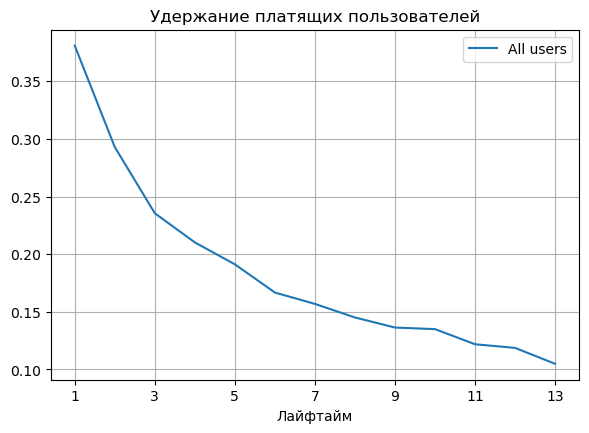

In [52]:
# дополнительно высчитаем удержание 14-ого дня у платящих пользователей
retention_raw_14_payers, retention_14_payers, retention_in_time_14_payers = get_retention(
    profiles = non_organic_profiles[non_organic_profiles['payer']==True],
    sessions = visits,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon
)

# визуализируем результат
plot_retention(retention = retention_14_payers, retention_history = retention_in_time_14_payers, horizon = analysis_horizon)
plt.show()

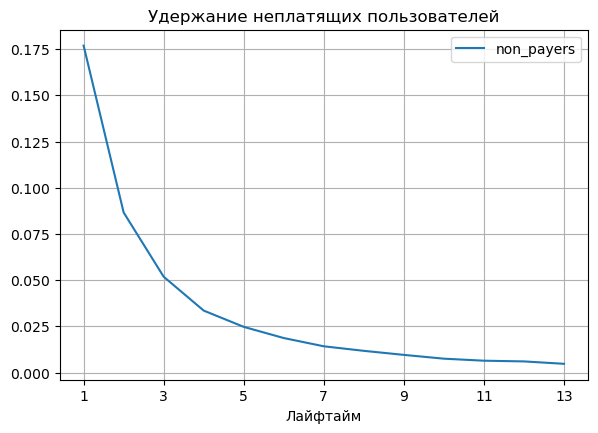

In [53]:
# дополнительно высчитаем удержание 14-ого дня у неплатящих пользователей
retention_raw_14_non_payers, retention_14_non_payers, retention_in_time_14_non_payers = get_retention(
    profiles = non_organic_profiles[non_organic_profiles['payer']==False],
    sessions = visits,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon
)
# задаём размер сетки для графиков
plt.figure(figsize=(15, 10))

# исключаем размеры когорт и удержание первого дня
retention_14_non_payers = retention_14_non_payers.drop(columns=['cohort_size', 0])
# в таблице динамики оставляем только нужный лайфтайм
retention_in_time_14_non_payers = retention_in_time_14_non_payers.drop(columns=['cohort_size'])[
    [analysis_horizon - 1]
]

# если в индексах таблицы удержания только payer,
# добавляем второй признак — cohort
if retention_14_non_payers.index.nlevels == 1:
    retention_14_non_payers['cohort'] = 'non_payers'
    retention_14_non_payers = retention_14_non_payers.reset_index().set_index(['cohort', 'payer'])

# в таблице графиков — два столбца и две строки, четыре ячейки
# в первой строим кривые удержания платящих пользователей
ax1 = plt.subplot(2, 2, 1)
retention_14_non_payers.query('payer == False').droplevel('payer').T.plot(
    grid=True, ax=ax1
)
plt.legend()
plt.xlabel('Лайфтайм')
plt.title('Удержание неплатящих пользователей')
plt.show()

Как мы видим, удержание платящих пользователей естественным образом отличается от неплатящих: на первой неделе удержание платящих пользователей спускается с 40% до 15%, пока удержание за аналогичный период у неплатящих пользователей падает с 18% до 2%. Далее на второй неделе неплатящие пользователи выходят на плато в 1-2%, в то время как у платящих пользователей удержание продалжает падать с 15% до 10%.

Дополним результаты детализацией по когортам: устройства, страны и каналы привлечения.

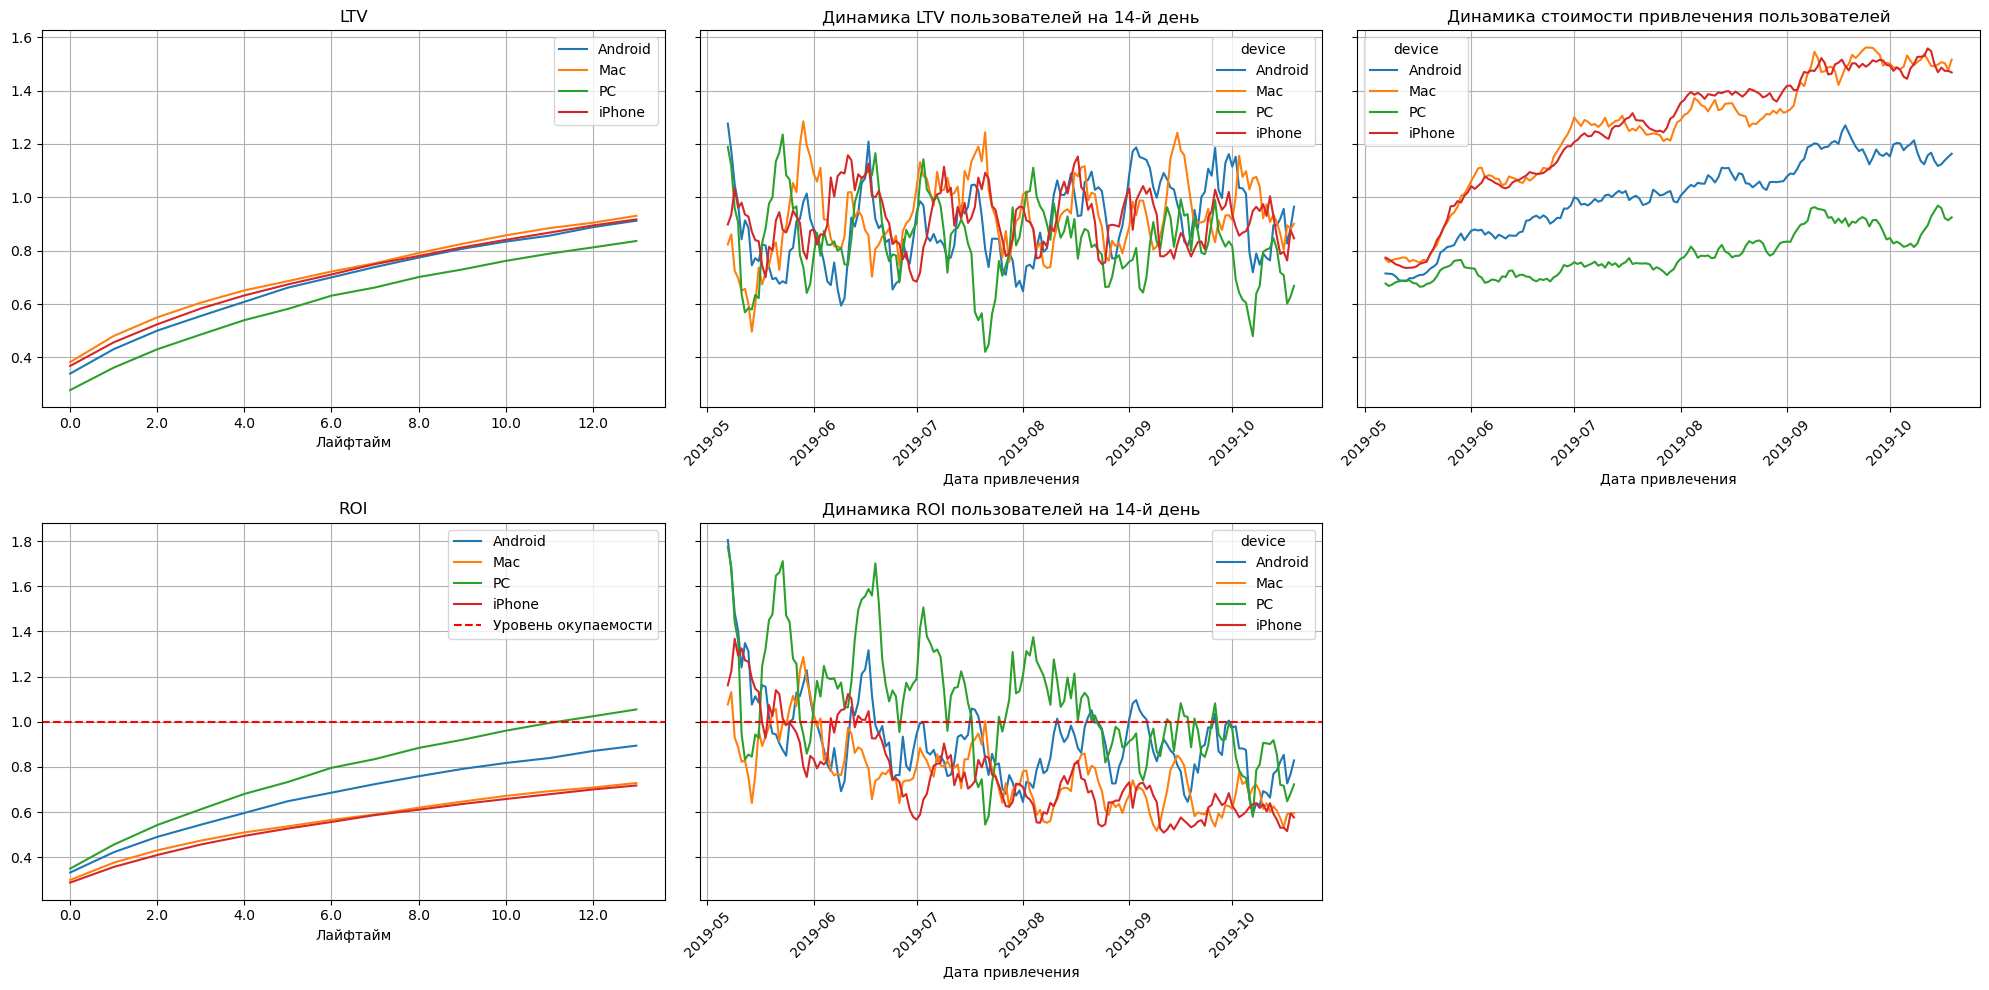

In [54]:
# получим метрики 14-ого дня по устройствам
ltv_raw_14_device, ltv_14_device, ltv_in_time_14_device, roi_14_device, roi_in_time_14_device = get_ltv(
    profiles = non_organic_profiles,
    purchases = orders,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    # добавляем критерий когорты по устройствам
    dimensions = ['device']
)

# визуализируем результат через функцию plot_ltv_roi()
plot_ltv_roi(ltv_14_device, ltv_in_time_14_device, roi_14_device, roi_in_time_14_device, analysis_horizon)
plt.show()

Мы наблюдаем стабильность LTV, которая повторяет общий тренд LTV, однако ее динамика демонстрирует резкие падения у пользователей персональных компьютеров. Учитывая низкие показатели конверсии у такой когорты, изолированно такое поведение может быть вполне характерным. Однако, если взглянуть на стоимость привлечения, то обнаружим постепенное увеличение затрат у пользователей продукции Apple, а именно у пользователей iPhone и Mac. Дополняет характеристику этих платформ ROI 14-ого дня и в динамике: данные когорты не окупаются в срок 2 недель, а также постепенно падают в динамике, уступая менее платящм пользователем PC и Android. Важно отметить, что до июня показатели были схожи, но далее мы наблюдаем критичное расхождение при условии, что данные когорты (Apple) самые платящие, то есть исследуемая проблема заключается в неудачной конверсии или оттоке самой платежеспособной базы пользователей.  
Отдельного упоминания требует когорта пользователей персональных компьютеров: это единственная когорта, которая пересекает порог окупаемости на 11 день, что во многом объясняется самой низкой стоимостью привлечения. Однако данная когорта демонстрирует самые слабые показатели LTV в статитке и схожие прочим показатели в динамике с периодичными падениями.

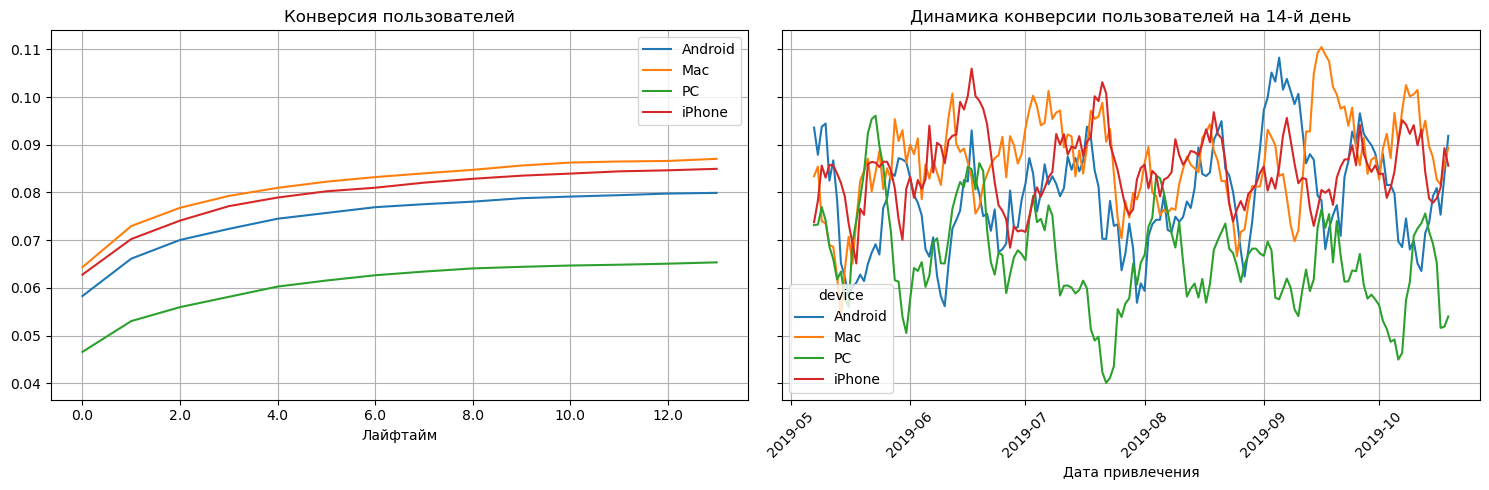

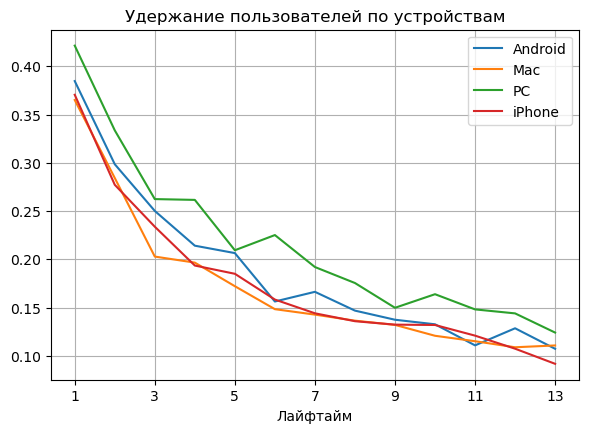

In [55]:
# высчитаем конверсию 14-ого дня по устройствам
cr_raw_14, cr_14, cr_in_time_14 = get_conversion(
    profiles = non_organic_profiles,
    purchases = orders,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    dimensions = ['device']
)

# дополнительно высчитаем удержание 14-ого дня по устройствам
retention_raw_14, retention_14, retention_in_time_14 = get_retention(
    profiles = non_organic_profiles,
    sessions = visits,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    dimensions = ['device']
)

# визуализируем результат
plot_conversion(cr_14, cr_in_time_14, horizon=analysis_horizon)
plot_retention(retention = retention_14, retention_history = retention_in_time_14, horizon = analysis_horizon)
plt.title('Удержание пользователей по устройствам')
plt.show()

Сопоставляя конверсию и удеражание по устройствам, мы наблюдаем схоже удержание у всех когорт с небольшим обгоном остальных когорт пользователями PC, однако именно данная когорта отличается самой низкой конверсией. Пользователи Mac, iPhone и Android показывают схожие результаты по конверсии и удержанию, однако в динамике конверсия пользователей этих устройств на 14 день периодами выстреливает, достигая значений 11%.  
Дополним анализ когортами по странам.

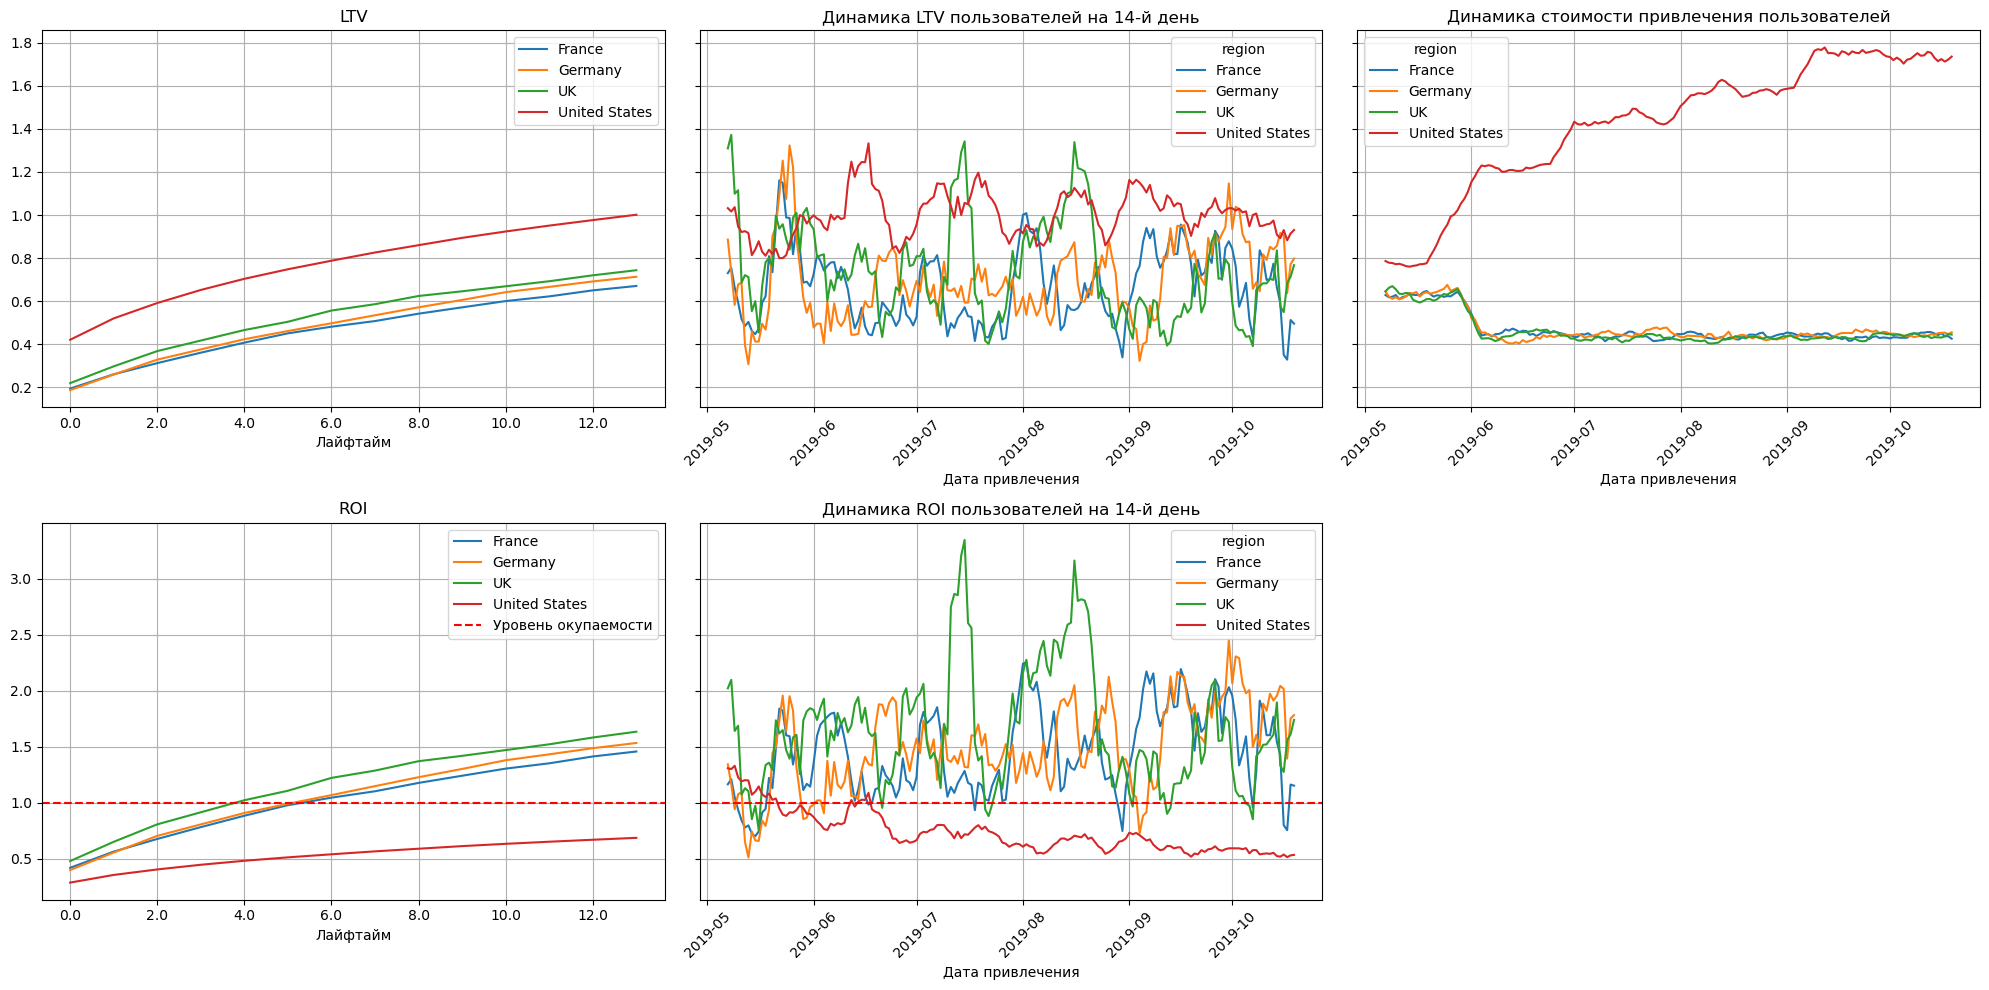

In [56]:
# получим метрики 14-ого дня по странам
ltv_raw_14_region, ltv_14_region, ltv_in_time_14_region, roi_14_region, roi_in_time_14_region = get_ltv(
    profiles = non_organic_profiles,
    purchases = orders,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    # добавляем критерий когорты по странам
    dimensions = ['region']
)

# визуализируем результат через функцию plot_ltv_roi()
plot_ltv_roi(ltv_14_region, ltv_in_time_14_region, roi_14_region, roi_in_time_14_region, analysis_horizon)
plt.show()

Сразу же видны аномальные тренды. LTV стабилен как статике, так и в динамике, хоть и достигает окупаемость под конец горизонта анализа, а вот стоимость привлечения "кричит" о том, что в США (в самом прибыльном рынке) стоимость привлечения резко растет, пока остальные страны, наоборот, резко снизили стоимость в июне и продолжают держаться на уровне 0,4. Соответственно, как и можно было ожидать, ROI как в статитке, так и в динамике падает: это единственная страна, где ROI не пересекает окупаемость (а в остальных - пересекает, достигая 150%), а также, опять-таки, с июня стабильно стремится к значениям 0,5 к настоящему моменту.  
Ситуацию спасают остальные страны: при LTV в 0,7 на 14-ый день в статитике и динамике, с июня стоимость привлечения падает почти вдвое до 0,4, что увеличивает окупаемость до 150% в статике и периодами достигает от 200 до 300% в динамике. Особенно выделяется в данном отношении Соединенное Королевство, обгоняя по ROI остальные когорты и демонстрируя в динамике самые мощные скачки возврата инвестиций.

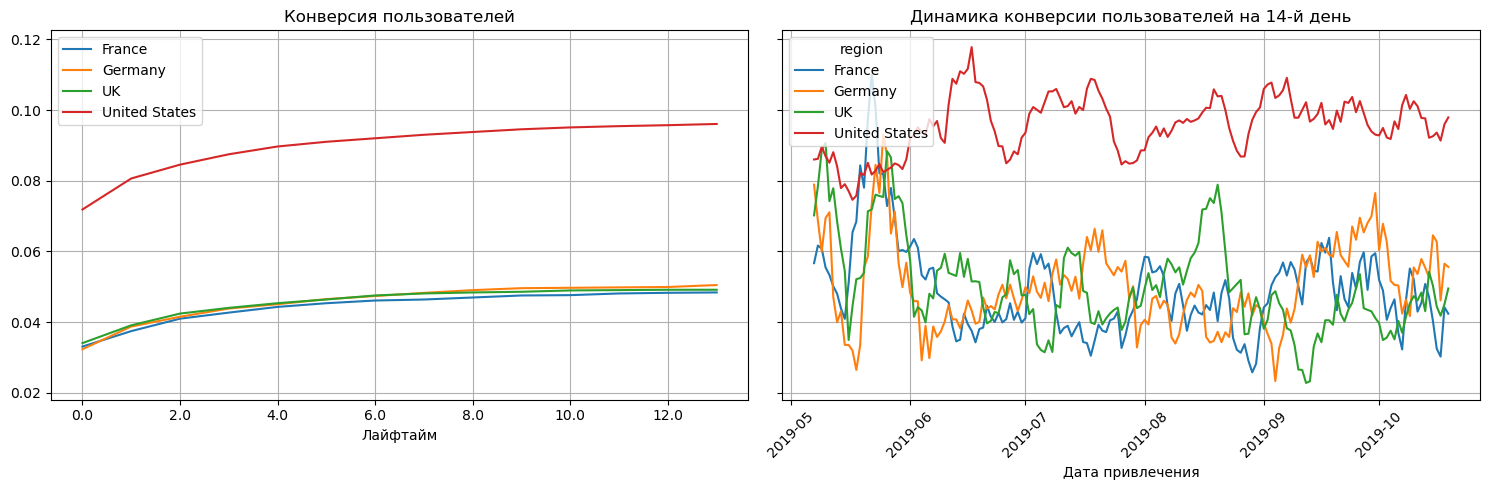

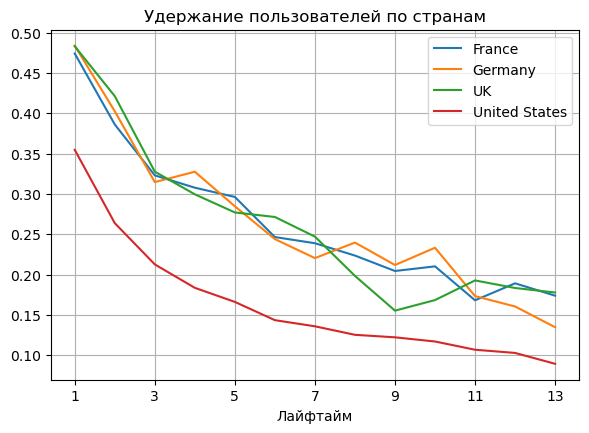

In [57]:
# высчитаем конверсию 14-ого дня по странам
cr_raw_14, cr_14, cr_in_time_14 = get_conversion(
    profiles = non_organic_profiles,
    purchases = orders,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    dimensions = ['region']
)

# дополнительно высчитаем удержание 14-ого дня по странам
retention_raw_14, retention_14, retention_in_time_14 = get_retention(
    profiles = non_organic_profiles,
    sessions = visits,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    dimensions = ['region']
)

# визуализируем результат
plot_conversion(cr_14, cr_in_time_14, horizon=analysis_horizon)
plot_retention(retention = retention_14, retention_history = retention_in_time_14, horizon = analysis_horizon)
plt.title('Удержание пользователей по странам')
plt.show()

Конверсия и удержание в данном случае симметричные друг другу: США с самым низким удержанием в 8% на 14 день, демонстрирует более высокие показатели конверсии в покупку в пределах 10%. И, наоборот, прочие когорты имеют более высокое удержание (~20%) на 14 день и слабые показатели конверсии на уровне 5%.
Учитывая представленное выше, мы можем более внятно охарактеризовать генезис проблемы: резкое увеличение затрат на американский рынок в купе с низким удержанием самой платежеспособной когорты привело к снижению доходов (в терминах ABC-анализа) категории A. Дополнительно отметим, что резкие положительные (вплоть до невероятных) скачки ROI демонстрирует Соединенное Королевство, достигая уровня свыше 3.0. В этом отношении данная когорта смягчила эффект увеличения затрат, однако ключевой регион все равно проседает.  
Проверим каналы привлечения.

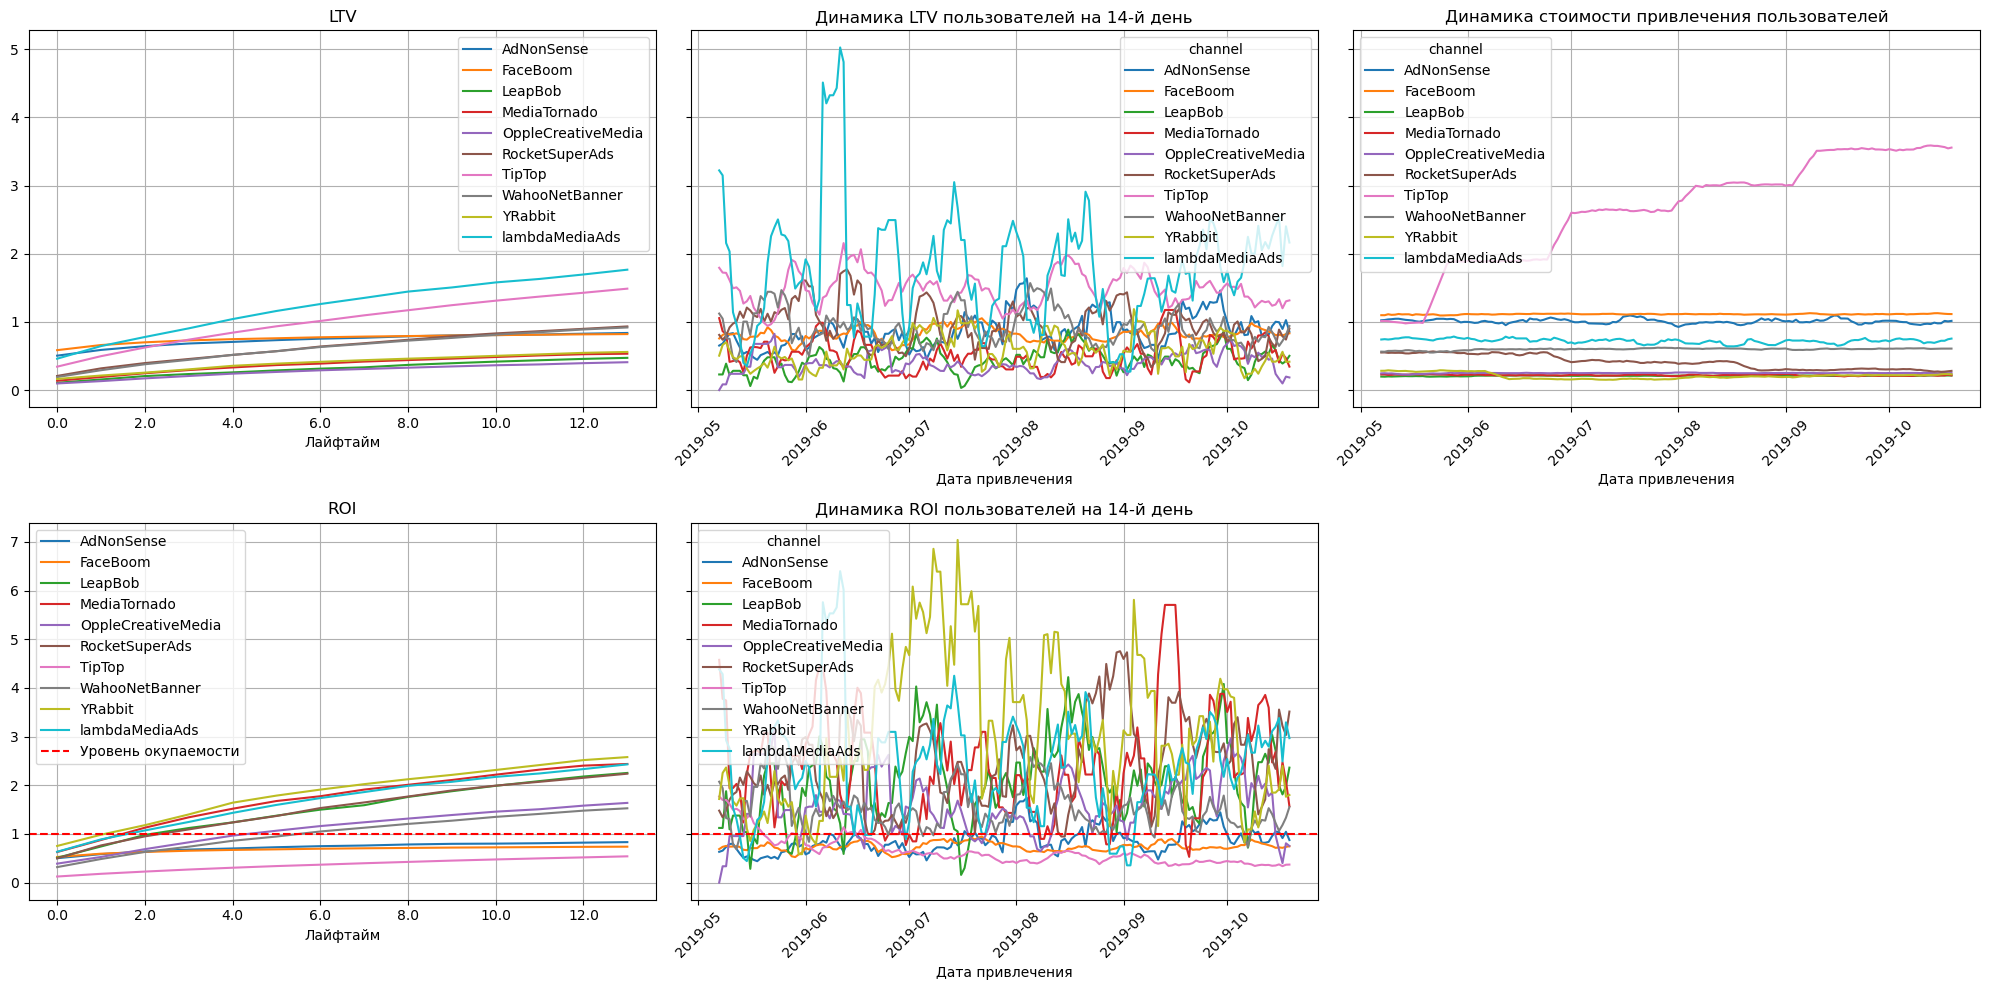

In [58]:
# получим метрики 14-ого дня по каналам привлечения
ltv_raw_14_ad, ltv_14_ad, ltv_in_time_14_ad, roi_14_ad, roi_in_time_14_ad = get_ltv(
    profiles = non_organic_profiles,
    purchases = orders,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    # добавляем критерий когорты по каналам привлечения
    dimensions = ['channel']
)

# визуализируем результат через функцию plot_ltv_roi()
plot_ltv_roi(ltv_14_ad, ltv_in_time_14_ad, roi_14_ad, roi_in_time_14_ad, analysis_horizon)
plt.show()

LTV у когорт по разным источникам привлечения демонстрирует разный характер роста нарастающим итогом: заметна положительная динамика у lambdaMediaAds с достижением уровня 1 на пятый день лайфтайма и у TipTop - на 7-ой. Остальные источники не достигают этого уровня и на 14 день.

В динамике LTV заметны резкие скачки до 5(!) у того же источника lambdaMediaAds, что дополнительно свидетельствует о высоком "качестве" привлекаемых пользователей. Переменным успехом оборачиваются показатели TipTop, достигая уровня 2, однако оба источника к сентябрю приближаются к значениям остальных источников: переменные флуктуации на уровне и ниже 1. По такому графику можно с весомой долей уверенности утверждать, что наиболее платежеспособная когорта перестала с былым успехом конвертироваться в покупателей.

Данное предположение подтверждается и динамикой стоимости привлечения пользователей: здесь все каналы привлечения показывают стабильную стоимость, но именно TipTop с июня начинает каждый месяц увеличивать стоимость привлечения на половину уровня, достигая 3,5, что неимоверно дорого при отсутствии должной конверсии, а, как мы помним, именно TipTop приносит наибольшую прибыль.

Именно у когорты TipTop мы ожидаем и наблюдаем слабейшие показатели ROI  как в статике, так и в динамике. Вместе  с TipTop на одном неудовлетворительном уровне в данном отношении и AdNonSense c FaceBoom. Пользователи данных когорт не окупаются в срок бизнес-плана, а в динамике былая окупаемость опять-таки с июня прекращается и ROI постепенно падает, находясь ниже уровня окупаемости. Если же рассматривать положительные показатели, то в отношении ROI ярче всех показывает себя YRabbit, достигая периодами уровня 7, и MediaTornado, достигая 5, что, вероятно, и отложило эффект от падения когорты TipTop до сентября. К указанным в категорию прибыльных каналов стоит добавить и lambdaMediaAds. У этой когорты показатели достигают куда более скромных значений, однако именно эта когорта отличается хорошими показателями по всем метрикам, что делает ее потенциальной точкой роста.

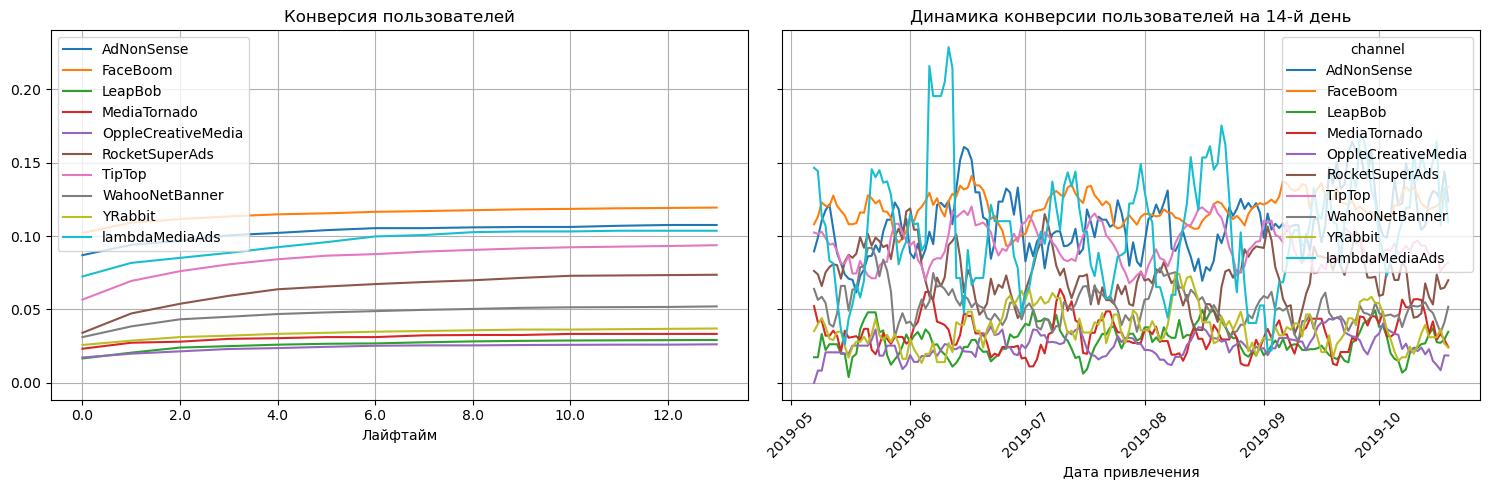

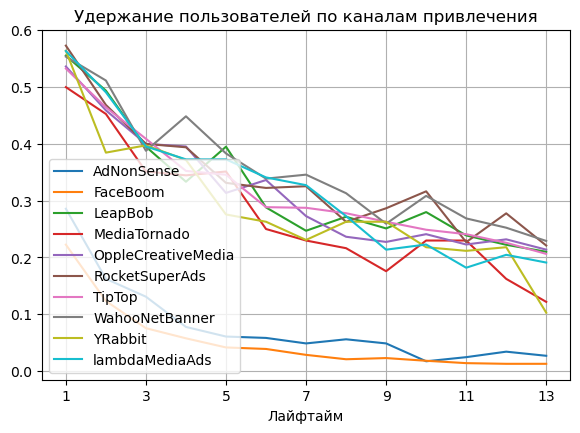

In [59]:
# высчитаем конверсию 14-ого дня по каналам привлечения
cr_raw_14, cr_14, cr_in_time_14 = get_conversion(
    profiles = non_organic_profiles,
    purchases = orders,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    dimensions = ['channel']
)

# дополнительно высчитаем удержание 14-ого дня по каналам привлечения
retention_raw_14, retention_14, retention_in_time_14 = get_retention(
    profiles = non_organic_profiles,
    sessions = visits,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    dimensions = ['channel']
)

# визуализируем результат
plot_conversion(cr_14, cr_in_time_14, horizon=analysis_horizon)
plot_retention(retention = retention_14, retention_history = retention_in_time_14, horizon = analysis_horizon)
plt.title('Удержание пользователей по каналам привлечения')
plt.show()

Лидерами по конверсии пользователей в покупку выступают FaceBoom, AdNonSense и lambdaMediaAds, достигая уже на 5 день показателей в 10% и выше. В динамике данные каналы демонстрируют флуктуации в указанных пределах, однако наиболее высокие скачки до 20% демонстрирует lambdaMediaAds. FaceBoom и AdNonSense же достаточно плохо показывают себя в удержании, приближаясь к минимально возможным значениям на 14 день, пока остальные каналы начинают удержание с 50-60% и на 14 день сохраняют в среденм 20% пользователей. Таким образом, наиболее выгодным каналом привлечения выступает lambdaMediaAds с относительно высокой конверсией, стандартным удержанием и относительно высокими показателями LTV и ROI.

Выяснив потенциально выгодные каналы продвижения, мы оставили без внимания низкое удержание пользователей из США как наиболее платежеспособного и легкоконвертируемомго региона. Также мы наблюдаем слабую представленность пользователей из Европы по отношению к пользователям из США. Рассмотрим метрики на одной когорте из США и попытаемся, выяснить, как преодолеть снижение доходности от ключевого региона.

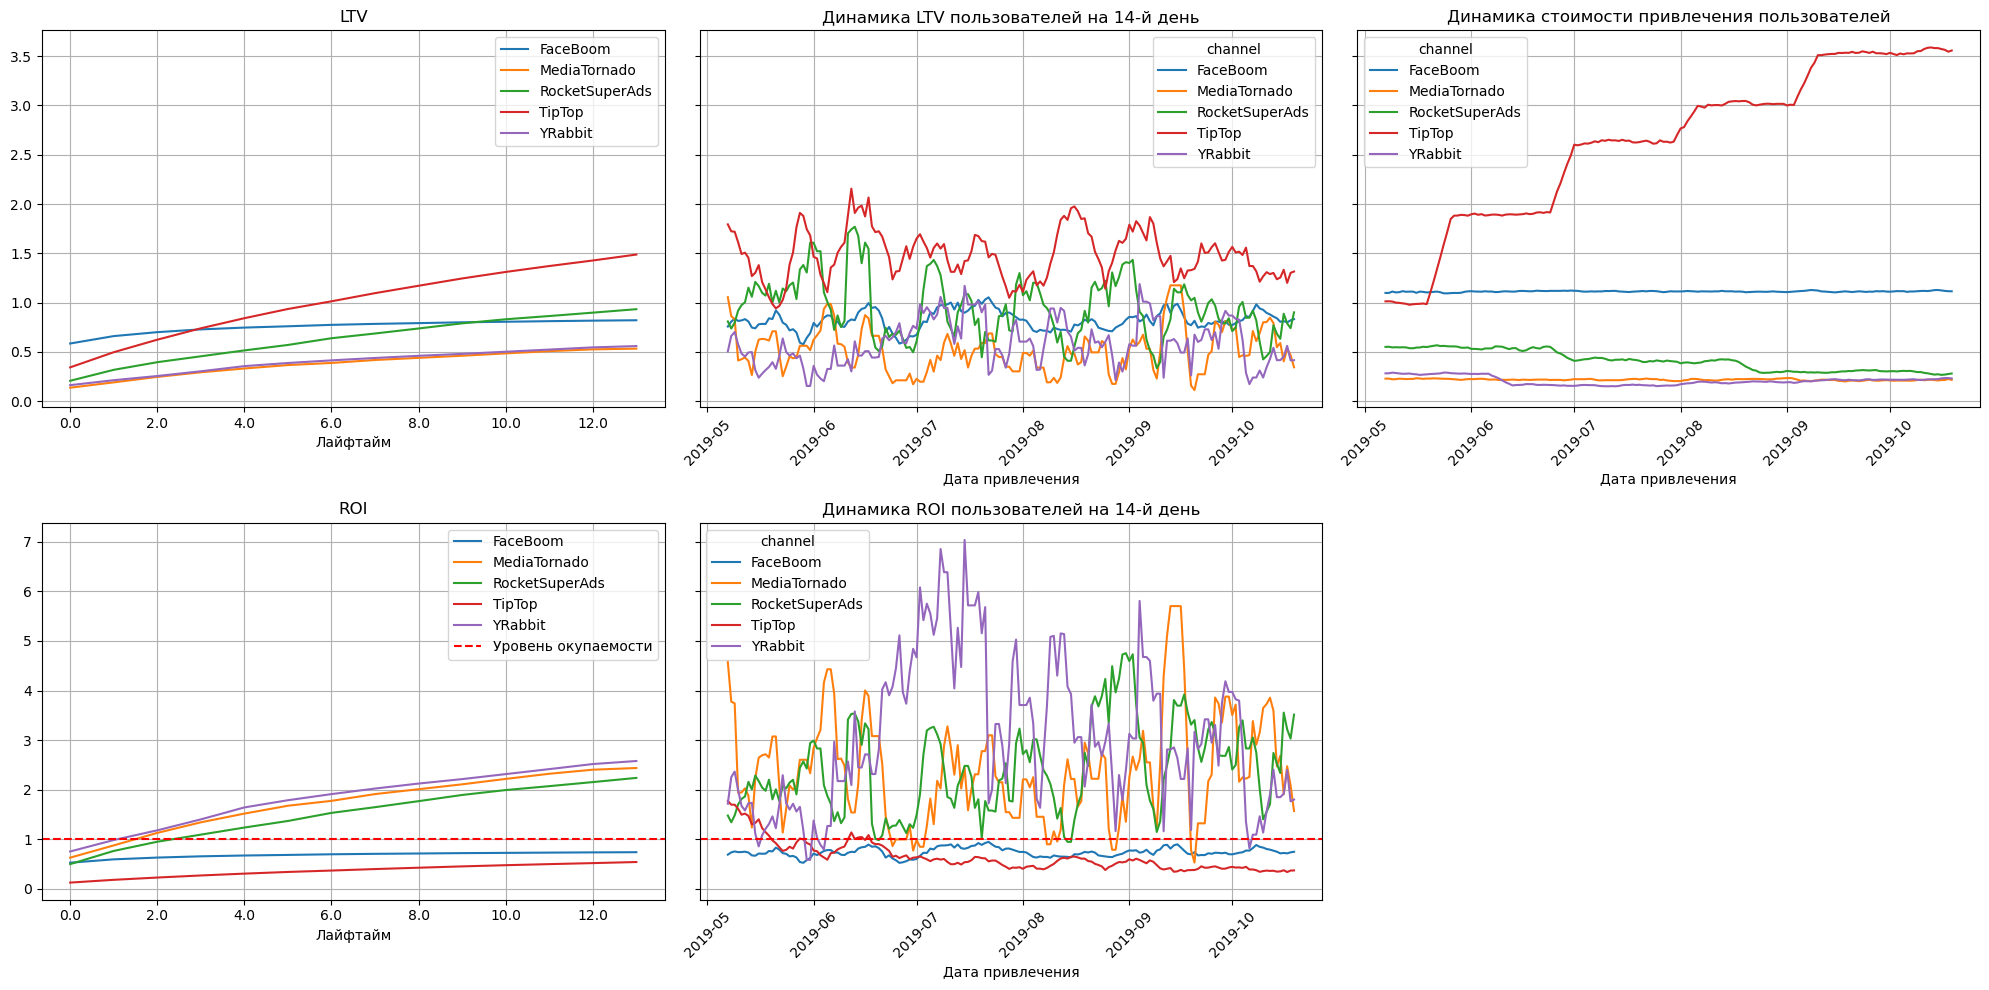

In [60]:
# получим срез профилей из США
usa_profiles = non_organic_profiles[non_organic_profiles['region'] == 'United States']

# получим метрики 14-ого дня по каналам привлечения в США
ltv_raw_14_ad, ltv_14_ad, ltv_in_time_14_ad, roi_14_ad, roi_in_time_14_ad = get_ltv(
    profiles = usa_profiles,
    purchases = orders,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    # добавляем критерий когорты по каналам привлечения
    dimensions = ['channel']
)

# визуализируем результат через функцию plot_ltv_roi()
plot_ltv_roi(ltv_14_ad, ltv_in_time_14_ad, roi_14_ad, roi_in_time_14_ad, analysis_horizon)
plt.show()

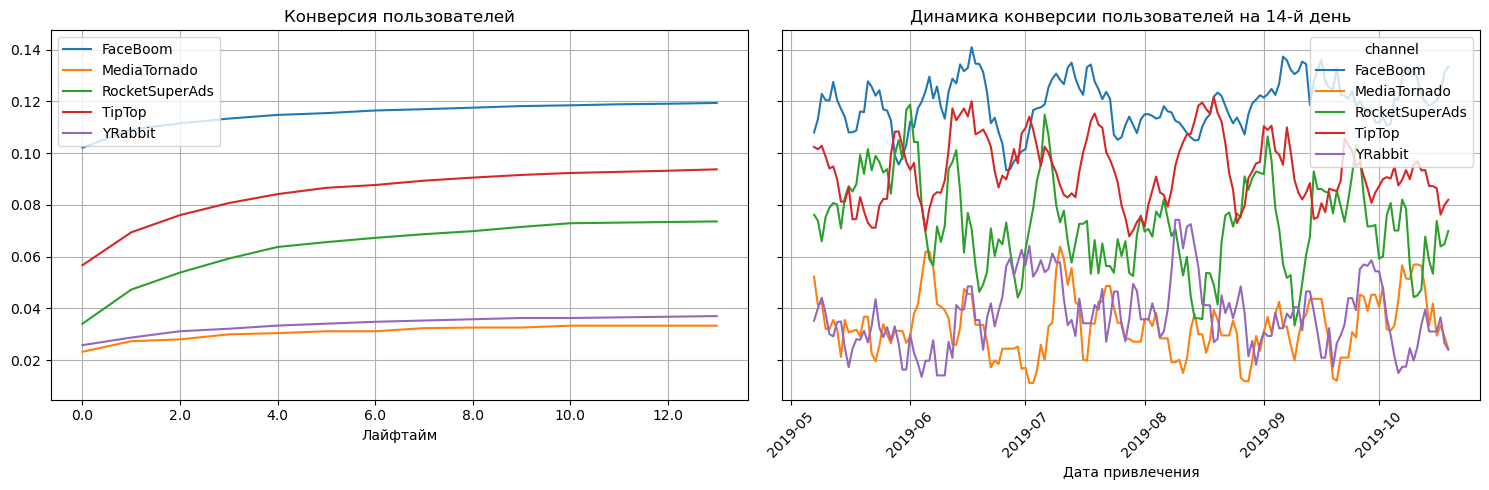

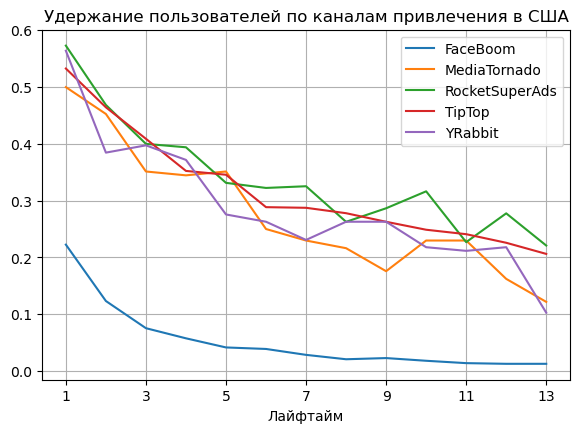

In [61]:
# высчитаем конверсию 14-ого дня по каналам привлечения в США
cr_raw_14, cr_14, cr_in_time_14 = get_conversion(
    profiles = usa_profiles,
    purchases = orders,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    dimensions = ['channel']
)

# дополнительно высчитаем удержание 14-ого дня по каналам привлечения в США
retention_raw_14, retention_14, retention_in_time_14 = get_retention(
    profiles = usa_profiles,
    sessions = visits,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    dimensions = ['channel']
)

# визуализируем результат
plot_conversion(cr_14, cr_in_time_14, horizon=analysis_horizon)
plot_retention(retention = retention_14, retention_history = retention_in_time_14, horizon = analysis_horizon)
plt.title('Удержание пользователей по каналам привлечения в США')
plt.show()

TipTop, как мы уже выяснили, в лидерах по показателям, однако именно из-за восходящего тренда по стоимости привлечения этот канал следует понизить в доли инвестиций. FaceBoom отлично конвертирует пользователей в покупку, но из-за самого слабого удержания, мы не наблюдаем ROI, пересекающего границу окупаемости, поэтому FaceBoom точно не следует ставить в потенциальные лидеры по инвестициям. В противовес указанным выше выделяются каналы RocketSuperAds, MediaTornado и YRabit как лидеры по ROI. Они стабильны по удержанию, однако имеют слабую конверсию: MediaTornado и YRabit имеет около 3% к 14 дню, а RocketSuperAds - около 7% за аналогичный период, что делает его более перспективным каналом для вложений.

Посмотрим на похожий срез для стран Европы.

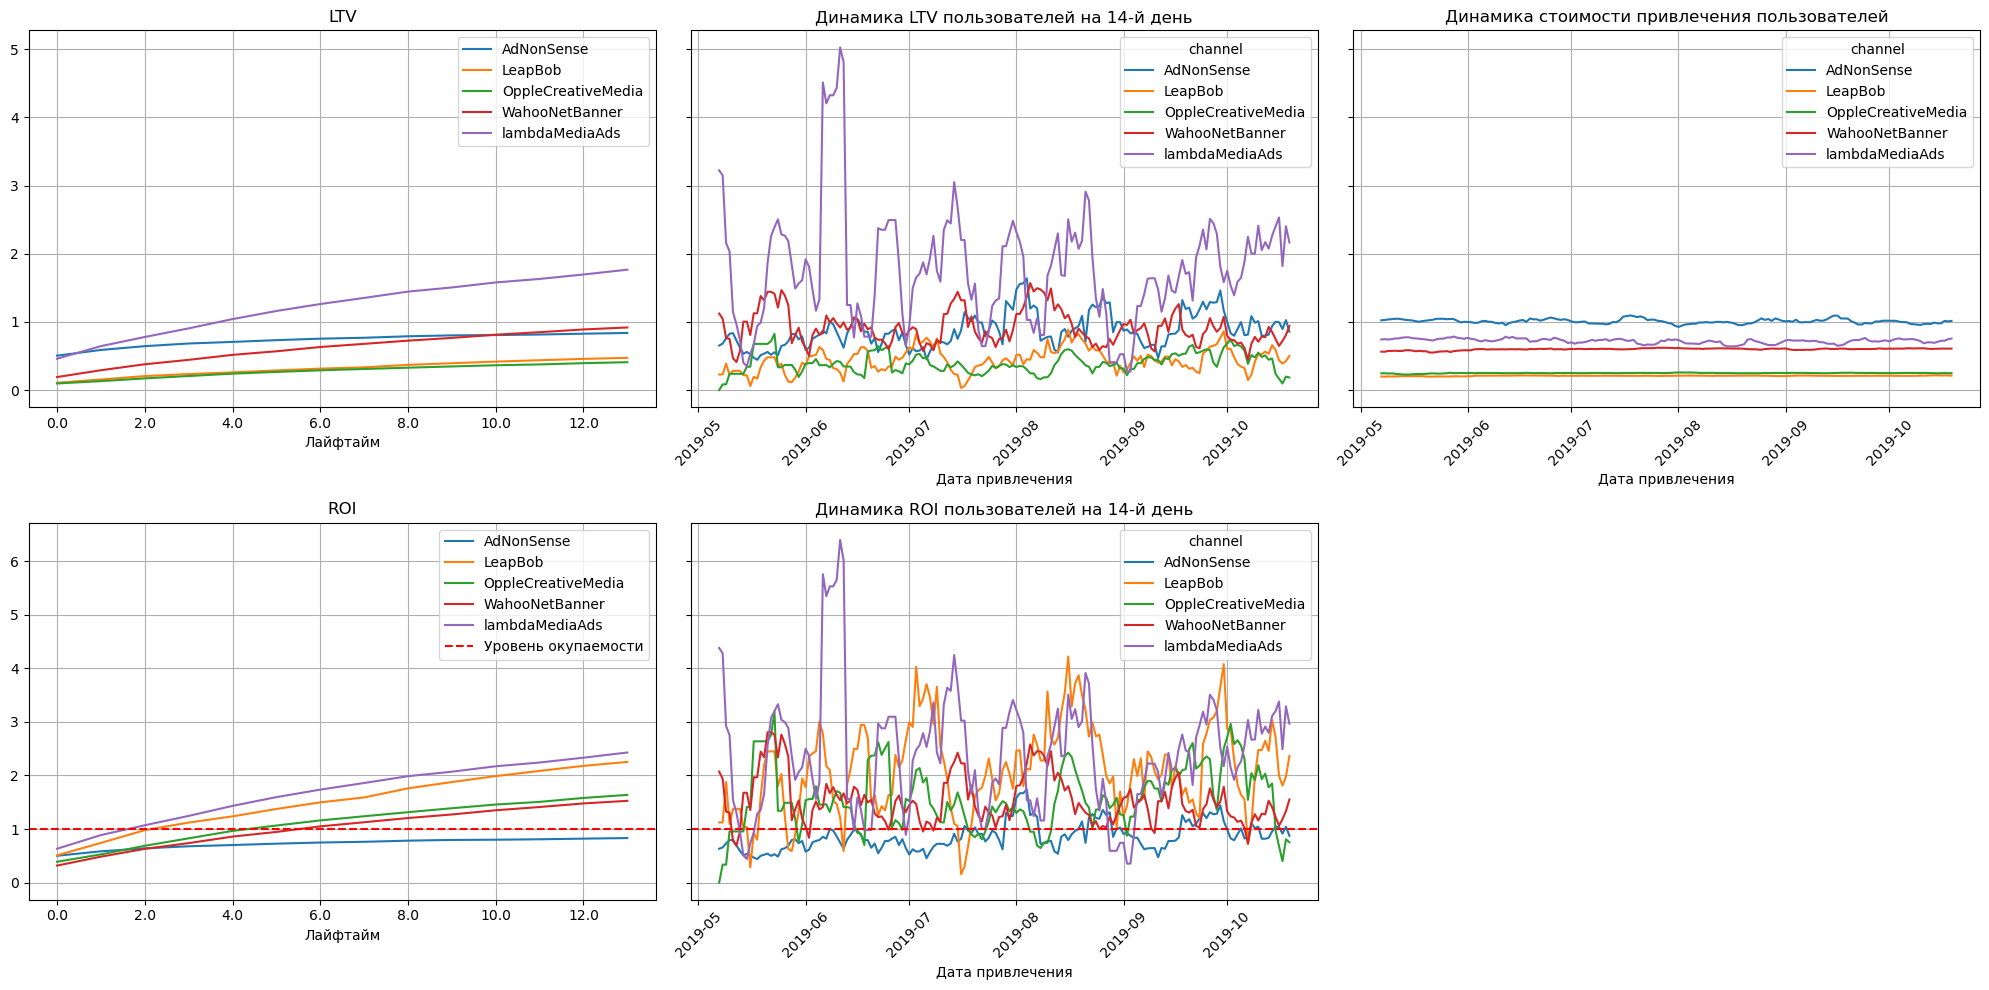

In [62]:
# получим срез профилей из Европы
eu_profiles = non_organic_profiles[non_organic_profiles['region'] != 'United States']

# получим метрики 14-ого дня по каналам привлечения в Европе
ltv_raw_14_ad, ltv_14_ad, ltv_in_time_14_ad, roi_14_ad, roi_in_time_14_ad = get_ltv(
    profiles = eu_profiles,
    purchases = orders,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    # добавляем критерий когорты по каналам привлечения
    dimensions = ['channel']
)

# визуализируем результат через функцию plot_ltv_roi()
plot_ltv_roi(ltv_14_ad, ltv_in_time_14_ad, roi_14_ad, roi_in_time_14_ad, analysis_horizon)
plt.show()

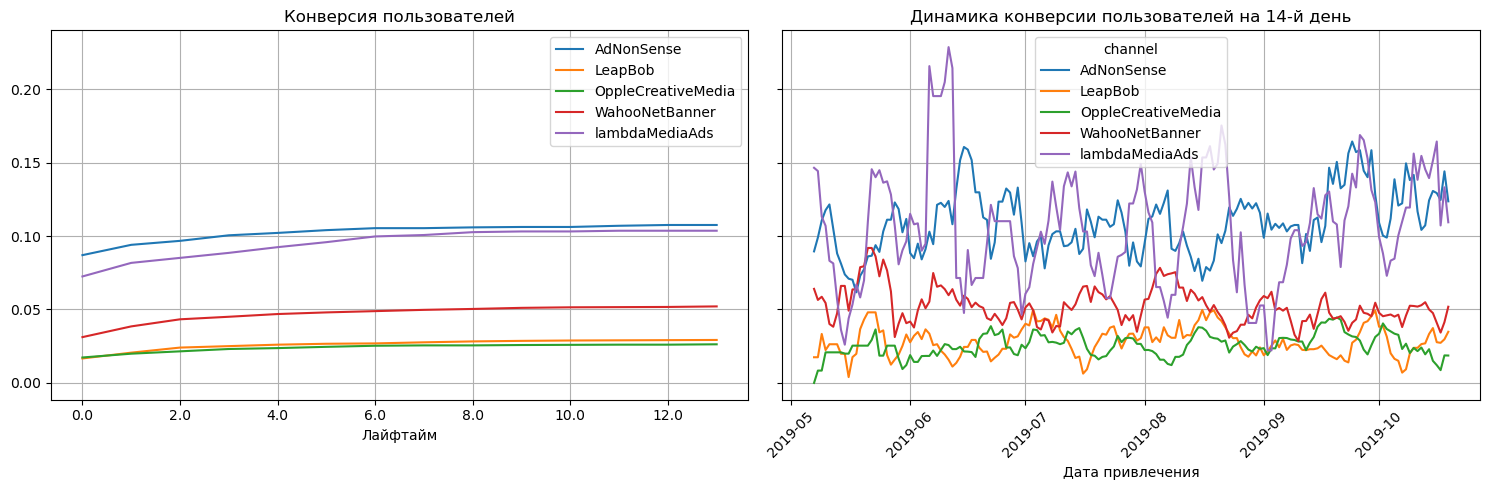

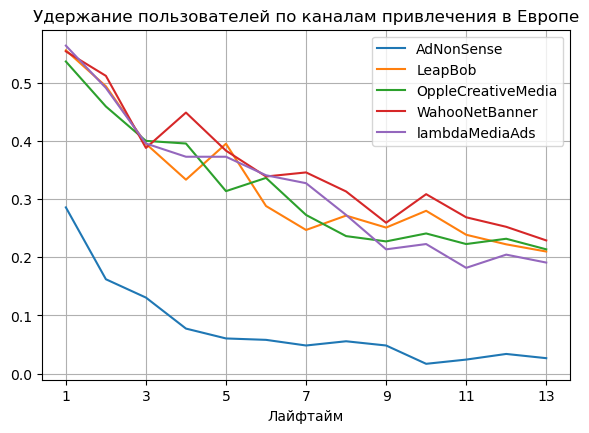

In [63]:
# высчитаем конверсию 14-ого дня по каналам привлечения в США
cr_raw_14, cr_14, cr_in_time_14 = get_conversion(
    profiles = eu_profiles,
    purchases = orders,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    dimensions = ['channel']
)

# дополнительно высчитаем удержание 14-ого дня по каналам привлечения в США
retention_raw_14, retention_14, retention_in_time_14 = get_retention(
    profiles = eu_profiles,
    sessions = visits,
    observation_date = analysis_moment,
    horizon_days = analysis_horizon,
    dimensions = ['channel']
)

# визуализируем результат
plot_conversion(cr_14, cr_in_time_14, horizon=analysis_horizon)
plot_retention(retention = retention_14, retention_history = retention_in_time_14, horizon = analysis_horizon)
plt.title('Удержание пользователей по каналам привлечения в Европе')
plt.show()

Относительно европейского сегмента пользователей явно выделяется lambdaMediaAds. Данный канал за неделю пересекает уровень, вдвое выше уровня окупаемости ROI, а также имеет близкий показатель LTV на 14 день, что обусловлено частыми скачками в динамике до уровня 3. Во многом такие результаты связаны и со стабильностью CAC на протяжении всего обозреваемого периода. Дополнительно пользователи данной когорты среди лидеров по конвертации в покупку при типовом для большинства когорт удержании. В противовес этому каналу следует отметить AdNonSense. При самой высокой из всех когорт стоимости привлечения на уровне 1, данный канал не демонстрирует стабильной окупаемости в статике, если не учитывать редкие флуктуации, превышающие желаемый уровень в динамике. LTV остается ниже уровня 1, хотя в динамике и наблюдаются скачки. И если конверсия пользователей в покупку близка lambdaMediaAds и в статике, и в динамике, то удержание на конец 2-ой недели близится к нулю. Данный канал явно следует заменить более перспективными. Так, имея схожие показатели конверсии и удержания, каналы LeapBob, OppleCreativeMedia и WahooNetBanner выгодно окупаются в течении первых 5 дней, что во многом объясняется дешевизной и стабильностью стоимости привлечения пользователей. Таким образом, в европейской рынке следует сосредоточить маркетинговые инвестиции на канале lambdaMediaAds (в первую очередь) и на LeapBob, OppleCreativeMedia и WahooNetBanner (во вторую очередь). От канала AdNonSense следует отказаться, так как привлекаемые пользователи не окупают вложений в привлечение по данному каналу.

### Промежуточные выводы

Проведя общий и когортный анализ базовых метрик с целью оценки окупаемости рекламы, мы можем выделить следующие моменты:

1) ситуация осени 2019 года - результат уменьшения ROI вследствие резко возрастающего CAC на ключевые когорты продукта;

2) в общем плане конверсия не претерпела сильных изменений, однако удержание пользователей достаточно низкое, что ставит под удар конверсию;

3) с точки зрения устройств наблюдается падение возврата инвестиций в маркетинг у всех когорт, однако именно наиболее конвертируемые когорты (iPhone и Mac) упали сильнее, что отражается и в возросшей стоимостью привлечения пользователей;

4) региональное деление пользователей имеет схожую тенденцию: наиболее платящий регион (США) теряет окупаемость ввиду резко возросшей стоимости привлечения и снижения удержания пользователей, что непосредственно влияет и на темп конверсии в покупку;  

5) по каналам привлечения наибольшие затраты наносит TipTop из-за резкого увеличения стоимости привлечения и FaceBoom с AdNonSense ввиду критически низкого удержания, однако возврат инвестиций остается высоким у других каналом (MediaTornado, YRabbit и lambdaMediaAds), что позволяет рассматривать смену фокуса в маркетинговой стратегии.  

6) наиболее перспективными каналами привлечения для региона США выступают MediaTornado и YRabbit, а для Европы: lambdaMediaAds.

-----------------------------------------------

## Этап 6. Выводы и рекомендации
### Обзор данных

Для выявления причин убыточности и поиска точек роста продукта  Procrastinate Pro+ использовалось 3 датасета:

1) `visits_info_short.csv` с логом посещений сайта,

2) `orders_info_short.csv` с данными заказов и

3) `costs_info_short.csv` с данными о расходах на рекламу.


После загрузки в датафреймы, их изначальные характеристики представляют собой:

1) `visits`: 309901 запись, 6 полей с типами данных `int64` и `object`, включая столбцы:
- `User Id` с идентификатором пользователя,       
- `Region` со страной пользователя,         
- `Device` с типом устройства пользователя,
- `Channel` с каналом привлечения пользователя,        
- `Session Start` с временной меткой начала сессии в продукте,  
- `Session End` с временной меткой окончания сессии пользователя.

2) `orders`: 40212 записей, 3 поля с типами данных `int64`, `object` и `float64`, включая столбцы:
- `User Id` с идентификатором пользователя,   
- `Event Dt` с временной меткой заказа, 
- `Revenue` с суммой заказа.

3) `costs`: 1800 записей, 3 поля с типами данных `object` и `float64`, включая столбцы:
- `dt` с временной меткой статьи затрат,       
- `Channel` с каналом привлечения,  
- `costs` с суммой привлечения.   

 
### Методология
Для выявления проблемных моментов рекламного привлечения,  а также поиска точек роста были осуществлены этапы работы с данными, представленные ниже.
#### Предобработка данных
По факту ознакомления с датафреймом пропуски выявлены не были, однако были обнаружены такие изъяны, как неконвенциональное наименование столбцов и типизация datetime-значений в формате `object`. 
В результаты предобработки данных наименования приведены к строчным буквам с нижним подчеркивание в строках, а типы данных скорректированы на подразумеваемые.

#### Функциональность для расчета LTV, ROI, Retention и CR
На данном этапе были подготовлены функциональные средства для расчета LTV, ROI, Retention и CR на основе профилей пользователей, а также для визуализации высчитанных метрик.

#### Исследовательский анализ данных
На данном этапе был проведен исследовательский анализ данных, включающий

- выявление срока располагаемых данных для выявления возможного горизонта анализа,

- выявление общей динамики привлечения за тот же период,

- подсчет количества пользователей как во всей совокупности, так и в когортах, разделенных по признаку региона, устройства и канала привлечения,

- анализ платящих пользователей, разделенных по тем же когортам,

- выводы по полученным данным в отношении заявленной цели команды.

 

#### Анализ маркетинговых показателей

На данном этапе были выявлены:

- общие затраты на рекламу за период располагаемых данных,

- доли затрат на рекламу по каждому источнику привлечения по неделям и месяцам,

- затраты на привлечение одного пользователя по каждому источнику,

- возможные  пути оптимизации маркетинговых затрат.

 

#### Оценка окупаемости рекламных вложений
На данном этапе были высчитаны базовые метрики 14-ого дня (LTV, ROI и CAC) на момент 01.11.2019, что включает анализ:

- всей совокупности пользователей,

- когорт пользователей по каналам привлечения,

- когорт пользователей по их странам,

- когорт пользователей по их устройствам,

- а также раздельный анализ окупаемости рекламных каналов по США и Европе отдельно.

В ходе оценки выявлены основные блоки окупаемости продукта, а также выявлены потенциально прибыльные каналы привлечения пользователей для США и Европы.

 

### Причины неэффективности привлечения пользователей
На основе проведенного анализа мы можем выделить следующие обстоятельства, прямо или косвенно связанные с падением доходов от продукта:
- самая ковертируемая в покупку когорта пользователей 1) из США, 2) пользователи iPhone, 3) привлекается через каналы TipTop и FaceBoom;
- на рубеже мая-июня 2019 начался умеренный рост стоимости привлечения пользователей по каналу TipTop в упомянутых выше когортах и соответствующий ему спад ROI, что к осени привело к чрезмерному превышению затрат над выручкой;
- несмотря на увеличивающиеся затраты на привлечение, должного эффекта у данной когорты не последовало: удержание достаточно резко падает, ROI не выходит на самоокупаемость (в отличие от смежных когорт по источнику);
- ниспадающий тренд по удержанию при высокой конверсии у наиболее финансируемых источников не позволяет вложениям ни окупиться, ни принести прибыль;
- затраты на привлечение пользователей из других стран, наоборот, упали к июню.
Здесь мы наблюдаем неэффективную стратегию использования маркетингового бюджета: вместо соразмерного распределения средств на источники, мы видим крайне узкий фокус на одной когорте и чуть ли не игнорирование прочих. Вне контекста сложно однозначно определить причины, однако на рубеже мая-июня началась не только сомнительная стратегия вложений в рекламу, но и должен быть какой-то внешний фактор, который усугубляет ситуацию, приводя к снижению удержания и увеличению оттока. Это может быть баг на стороне приложения, мешающий пользовательскому пути по воронке, или иной внешний отталкивающий фактор, но все же он остается отягчающим, но не основным, так как проблема началась еще в начале лета, а обеспокоенность проявилась лишь к осени. Это связано с постепенным ростом вложений в рекламные источники продвижения в соответствии с нерелевантными показателями "качества" привлеченных пользователей (а точнее с низким показателем удержания пользователей), хотя на летние месяцы еще приходятся новые пользователи от недооцененных каналов. Однако все лето вложения росли, а эффекта не прослеживалось. Это похоже на отсутствие контроля за показами рекламных баннеров при очевидной неэффективности и избыточности таких вложений. Для решения этой проблемы необходимо проследить за принципами оплаты рекламы и определить некоторый порог, за который вложения в то или иной источник не могут выходить (по крайней мере на первое время), а также диверсифицировать распределение рекламного бюджета по конвертируемости привлеченных пользователей. Кроме того, крайне необходимо пересмотреть маркетинговую стратегию, которая в первую очередь поставит своей целью вложение в наиболее окупающиеся рекламные каналы с учетом не только конверсии, но и удержания с общей стоимостью необходимых вложений.

### Рекомендации для отдела маркетинга
В качестве общей рекомендации отделу маркетинга следует предложить общий пересмотр принципов распределения рекламного бюджета на основе данных. Создается впечатление, что фокус в распределении рекламного бюджета был сосредоточен на конверсии и количеству привлеченных пользователей, хотя, судя по данным, не учитывались показатели удержания и окупаемости каналов по ROI. Углубляясь в детали, можно выделить следующие моменты:

+ проблема 1: наибольшие затраты уходят на неокупающиеся каналы, пока окупающиеся недофинансированы. 
+ решение 1: сместить фокус вложений в источники с самых привлекающих на самых удерживающих и конвертирующих в покупку с наиболее высоким показателем ROI (среди таких: MediaTornado, YRabbit для США и lambdaMediaAds для Европы). Такие каналы выделяются высокими показателями ROI, а также высоким удержанием при стабильной конверсии. Такие каналы не так заманчивы, как Tiptop и FaceBoom, но зато позволяют продлить период удержания пользователей с высокими показателями конверсии.

+ проблема 2: наиболее финансируемые каналы не окупаются из-за высокой стоимости привлечения и низкого удержания.
+ решение 2: необходимо уменьшить долю финансирования данных каналов до менее затратного уровня и проанализировать растущие затраты на привлечение (возможно стоит пересмотреть модель оплаты) и причины отскока пользователей, что и становится главным препятствием для конверсии, которая у них одна из высоких. В качестве вариантов можно рассмотреть различные варианты фасилитации онбординга на уровне пользовательского интерфейса, а также дополнительная коммуникация с пользователями для демонстрации ценности продукта и различные поощрения и вознаграждения (например, модель freemium). По факту изменений следует проследить удержание и конверсию в связке и затем возвращать прежние объемы финансирования.

+ проблема 3: низкая конверсия в покупку на уровне 8%, что достаточно мало и явно требует повышения хот бы до 25%.
+ решение 3: в решении 2 уже отмечалось, что следует предусмотреть возможность для пользователей уже на раннем этапе дать попробовать продукт и позволить ему почувствовать его ценность. Это можно сделать через подарки или пробные периоды. Также следует тщательно проверить воронку и CJM, чтобы не было блоков для потенциальной конверсии.